<a href="https://colab.research.google.com/github/pratheeshsailor/Jamboree-Education---Linear-Regression/blob/main/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case:Jamboree Education - Linear Regression

About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


Understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import preprocessing, svm
from statsmodels.formula.api import ols
import scipy as sp


Loading the Dataset

In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head(3)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72

Removing unwanted column from the dataset

In [ ]:
# drop Serial NO. column
df = df.drop(columns=['Serial No.'], axis=1)

In [ ]:
df.head(3)

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72

What is the shape of the loaded dataset ?

In [ ]:
df.shape

(500, 8)

Basic Information about the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


Basic Description of the Data

In [ ]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.560000    1.000000           0.72000  
75%      9.040000    1.000000           0.82000  
max      9.920000    1.000000           0.97000

Renaming columns - Removing extra whitespace "LOR " & "Chance of Admit "

In [ ]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

What are the columns present in the dataset?

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

What is the number of null values present in each column ?

In [ ]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Validating Duplicate Records

In [ ]:
# Duplicate values in the dataset
df.duplicated().sum()

0

Unique values (counts) for each Feature

In [ ]:
# unique values in the dataset
for col in df:
    print(f'Number of unique values in the {col} column:',df[col].nunique())

Number of unique values in the GRE Score column: 49
Number of unique values in the TOEFL Score column: 29
Number of unique values in the University Rating column: 5
Number of unique values in the SOP column: 9
Number of unique values in the LOR column: 9
Number of unique values in the CGPA column: 184
Number of unique values in the Research column: 2
Number of unique values in the Chance of Admit column: 61


In [ ]:
for i in df.columns:
    print(i, '--> ','\n', df[i].unique(), '\n')

GRE Score -->  
 [337 324 316 322 314 330 321 308 302 323 325 327 328 307 311 317 319 318
 303 312 334 336 340 298 295 310 300 338 331 320 299 304 313 332 326 329
 339 309 315 301 296 294 306 305 290 335 333 297 293] 

TOEFL Score -->  
 [118 107 104 110 103 115 109 101 102 108 106 111 112 105 114 116 119 120
  98  93  99  97 117 113 100  95  96  94  92] 

University Rating -->  
 [4 3 2 5 1] 

SOP -->  
 [4.5 4.  3.  3.5 2.  5.  1.5 1.  2.5] 

LOR -->  
 [4.5 3.5 2.5 3.  4.  1.5 2.  5.  1. ] 

CGPA -->  
 [9.65 8.87 8.   8.67 8.21 9.34 8.2  7.9  8.6  8.4  9.   9.1  8.3  8.7
 8.8  8.5  9.5  9.7  9.8  9.6  7.5  7.2  7.3  8.1  9.4  9.2  7.8  7.7
 9.3  8.85 7.4  7.6  6.8  8.92 9.02 8.64 9.22 9.16 9.64 9.76 9.45 9.04
 8.9  8.56 8.72 8.22 7.54 7.36 8.02 9.36 8.66 8.42 8.28 8.14 8.76 7.92
 7.66 8.03 7.88 7.84 8.96 9.24 8.88 8.46 8.12 8.25 8.47 9.05 8.78 9.18
 9.46 9.38 8.48 8.68 8.34 8.45 8.62 7.46 7.28 8.84 9.56 9.48 8.36 9.32
 8.71 9.35 8.65 9.28 8.77 8.16 9.08 9.12 9.15 9.44 9.92 9.11 8.2

Univariate Analysis

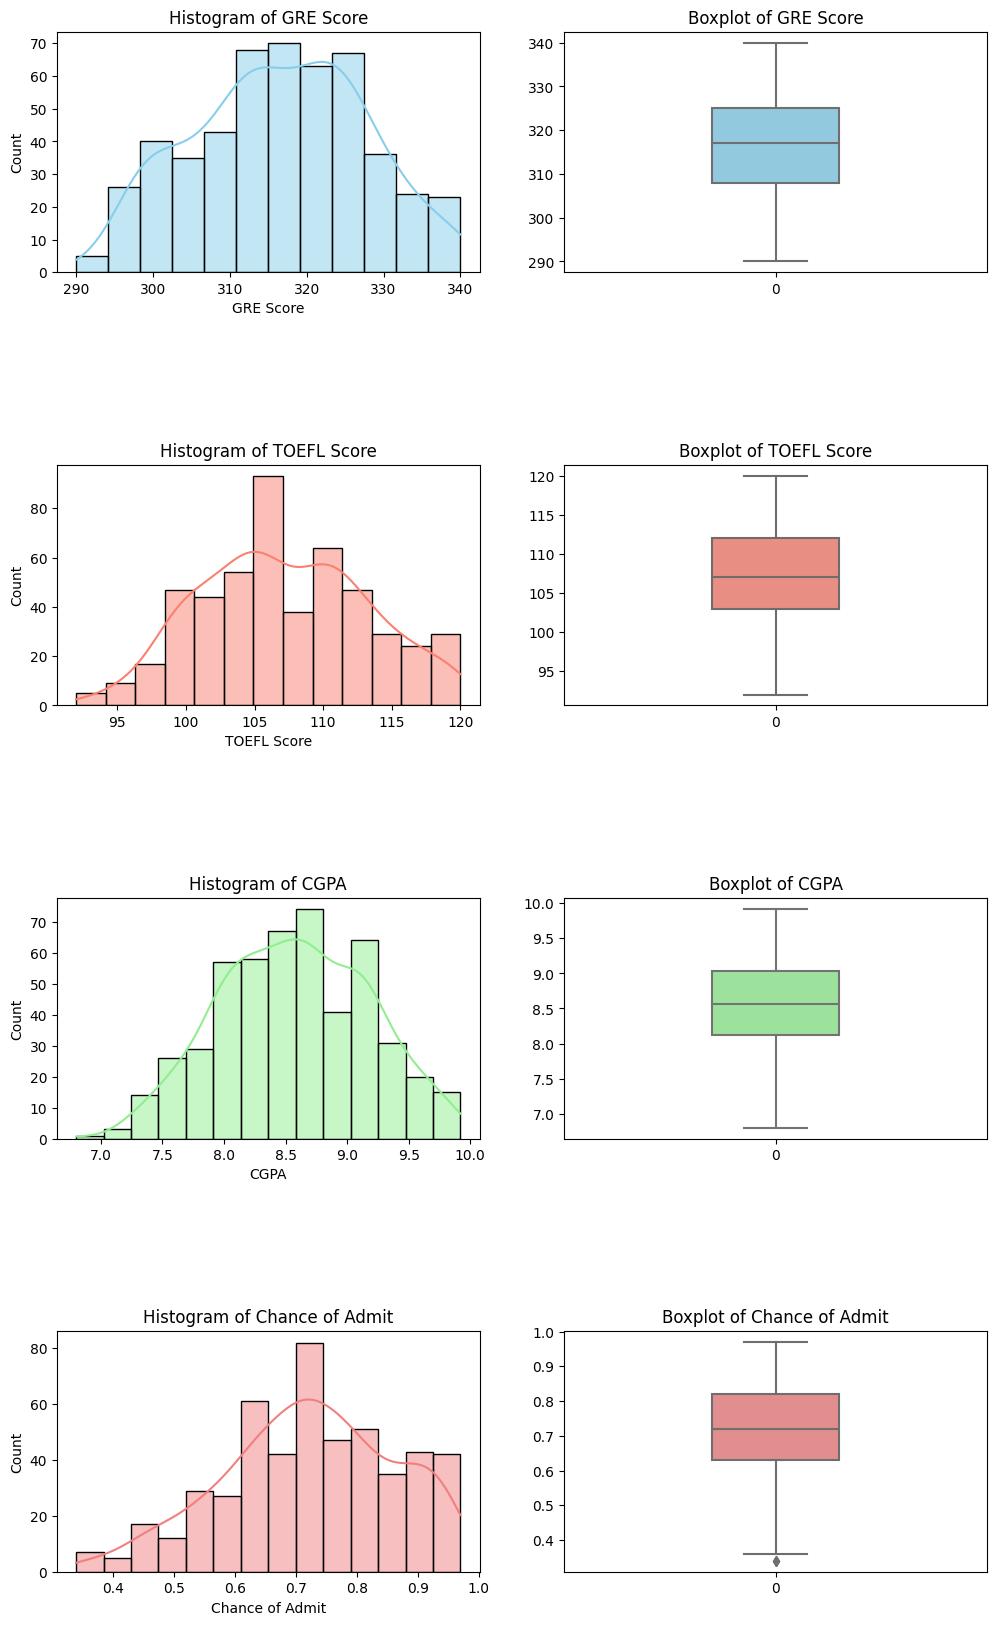

In [ ]:
# Columns to analyze
columns_to_analyze = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=2, figsize=(12, 5 * len(columns_to_analyze)))
fig.subplots_adjust(hspace=0.8)

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

for i, column in enumerate(columns_to_analyze):
    # Histogram
    sns.histplot(df[column], kde=True, ax=axes[i, 0], color=colors[i])
    axes[i, 0].set_title(f'Histogram of {column}')

    # Boxplot
    sns.boxplot(df[column],width= 0.3, ax=axes[i, 1], color=colors[i])
    axes[i, 1].set_title(f'Boxplot of {column}')

plt.show()

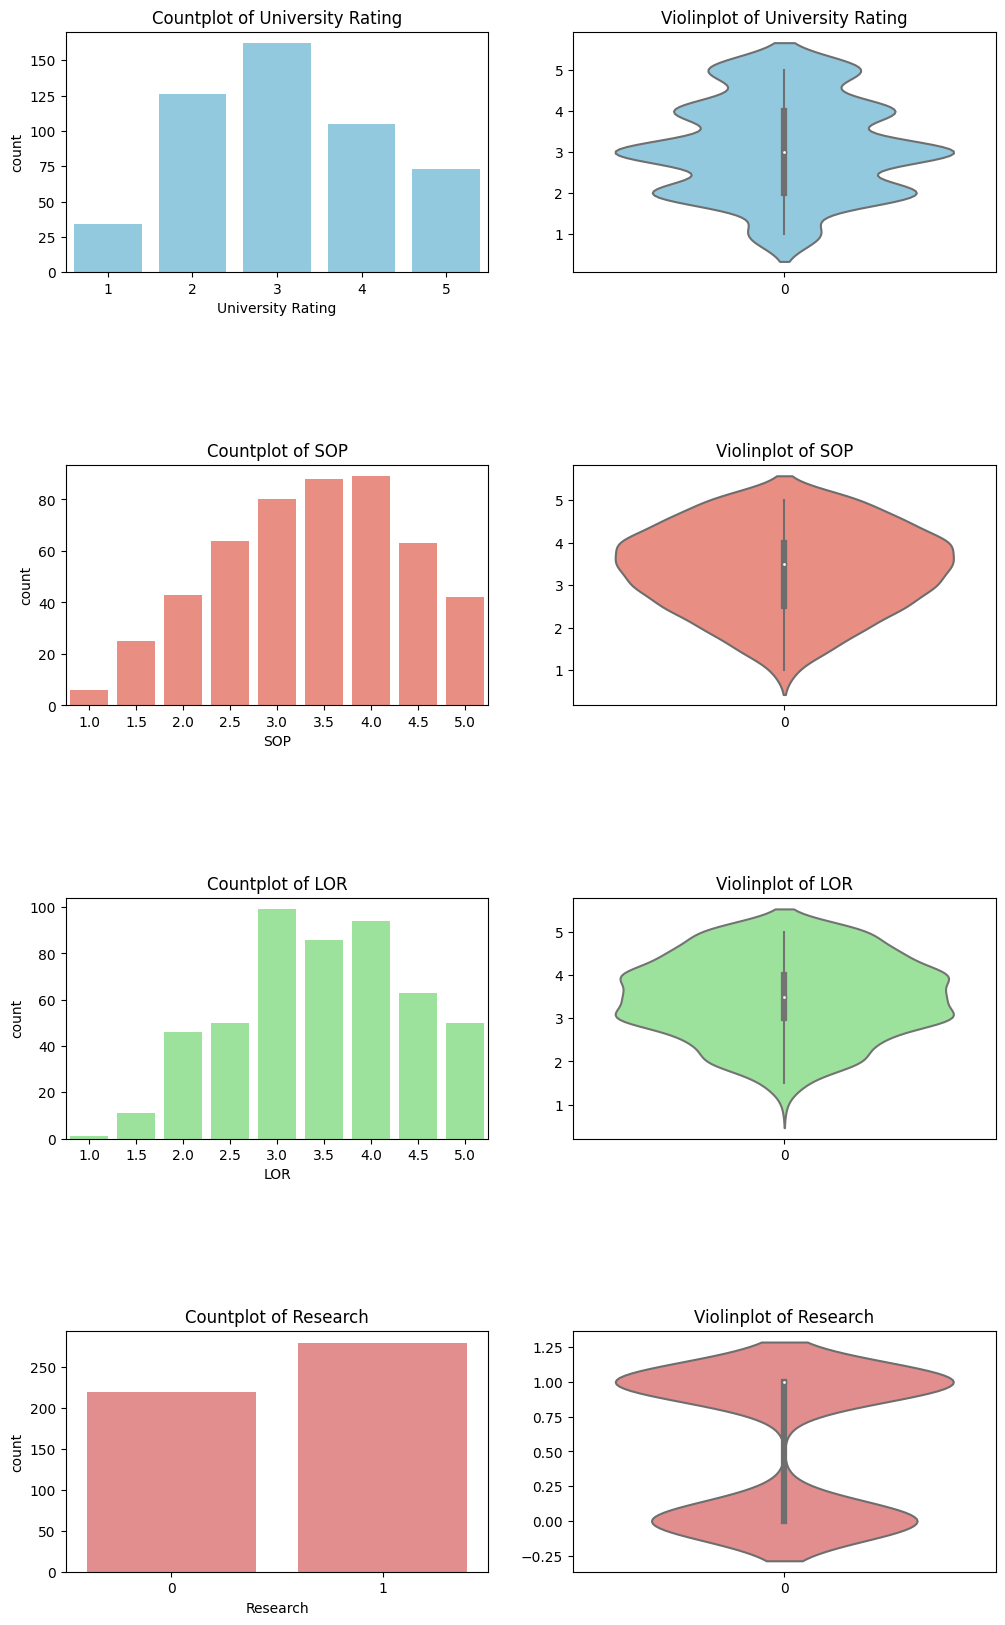

In [ ]:
# Columns to analyze
columns_to_analyze = ['University Rating', 'SOP', 'LOR', 'Research']

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=2, figsize=(12, 5 * len(columns_to_analyze)))
fig.subplots_adjust(hspace=0.8)

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen', 'lightcoral']

for i, column in enumerate(columns_to_analyze):
    # Countplot
    sns.countplot(x=column, data=df, ax=axes[i, 0], palette=[colors[i]])
    axes[i, 0].set_title(f'Countplot of {column}')

    # Violinplot
    sns.violinplot(df[column], ax=axes[i, 1], palette=[colors[i]])
    axes[i, 1].set_title(f'Violinplot of {column}')

plt.show()

Bivariate Analysis

categorial vs numerical

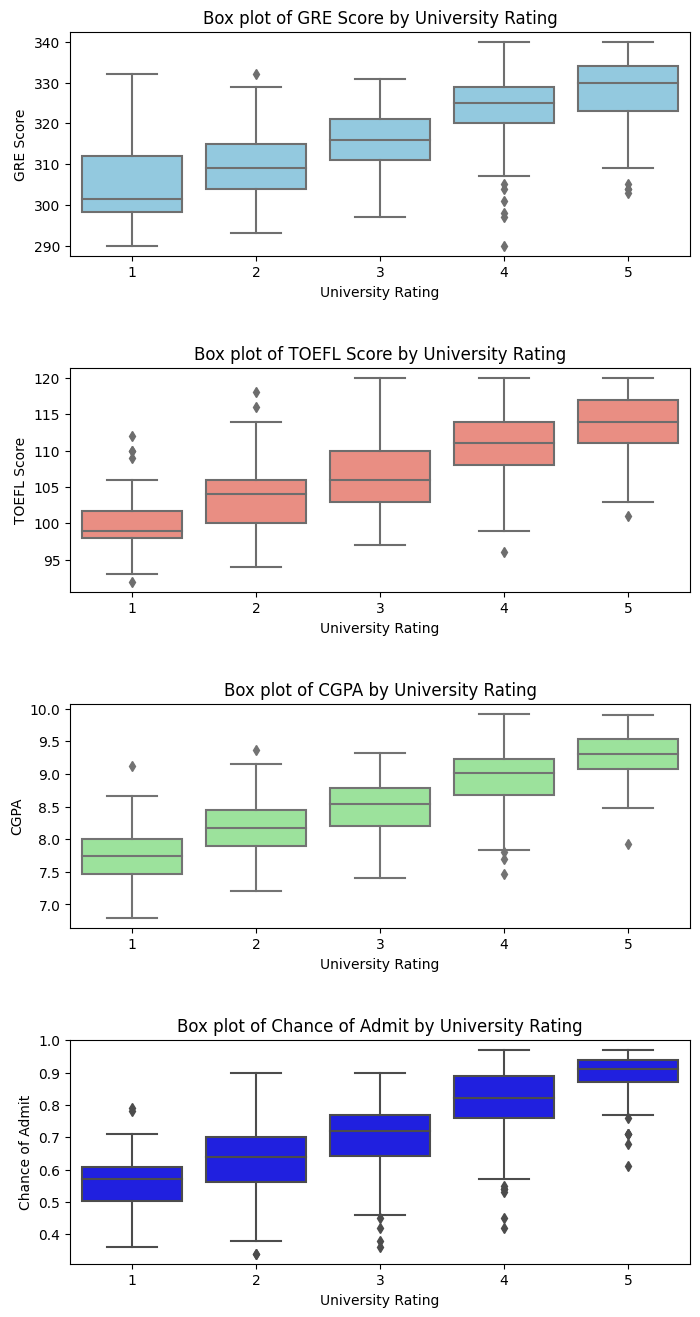

In [ ]:
# Columns to analyze
columns_to_analyze = ['GRE Score', 'TOEFL Score','CGPA','Chance of Admit']
x_column = 'University Rating'

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(8, 4 * len(columns_to_analyze)))
fig.subplots_adjust(hspace=0.5)

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen', 'blue']

for i, y_column in enumerate(columns_to_analyze):
    # Grouped box plot
    sns.boxplot(x=x_column, y=y_column, data=df, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'Box plot of {y_column} by {x_column}')

plt.show()

categorial vs categorial

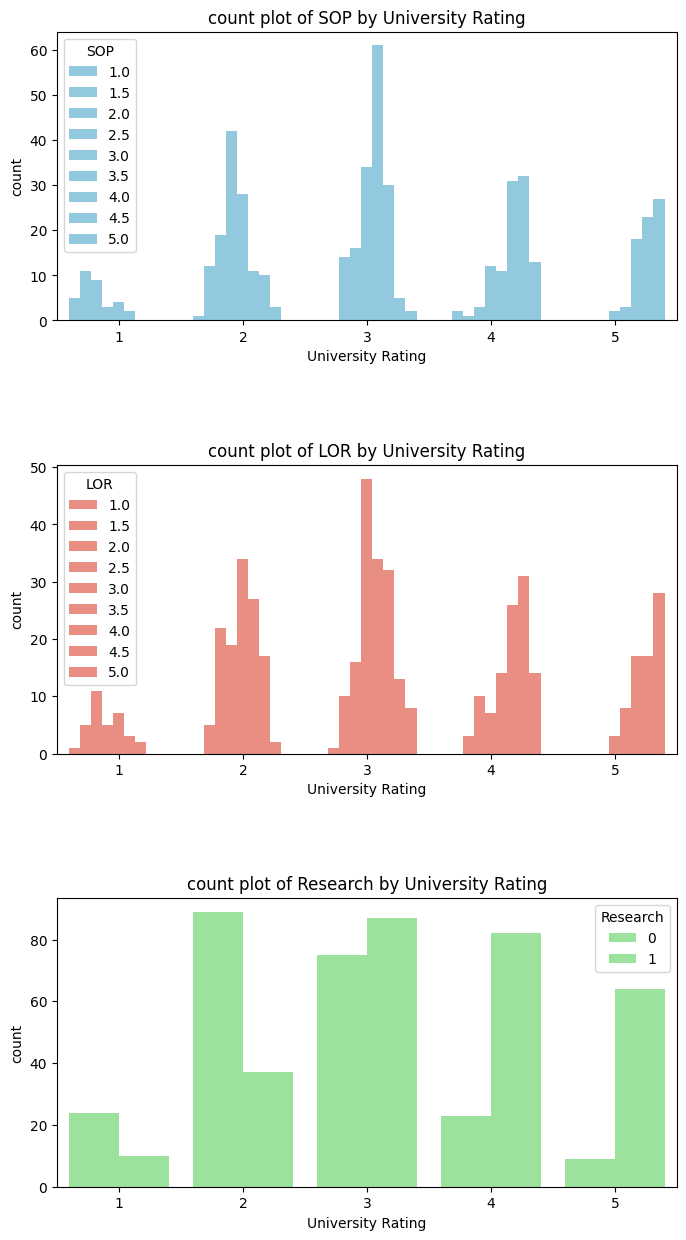

In [ ]:
# Columns to analyze
columns_to_analyze = ['SOP', 'LOR','Research']
x_column = 'University Rating'

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), ncols=1, figsize=(8, 5 * len(columns_to_analyze)))
fig.subplots_adjust(hspace=0.5)

# Define colors for each variable
colors = ['skyblue', 'salmon', 'lightgreen',]

for i, y_column in enumerate(columns_to_analyze):
    # Grouped box plot
    sns.countplot(x=x_column, hue=y_column, data=df, ax=axes[i], palette=[colors[i]])
    axes[i].set_title(f'count plot of {y_column} by {x_column}')

plt.show()

numerical vs numerical

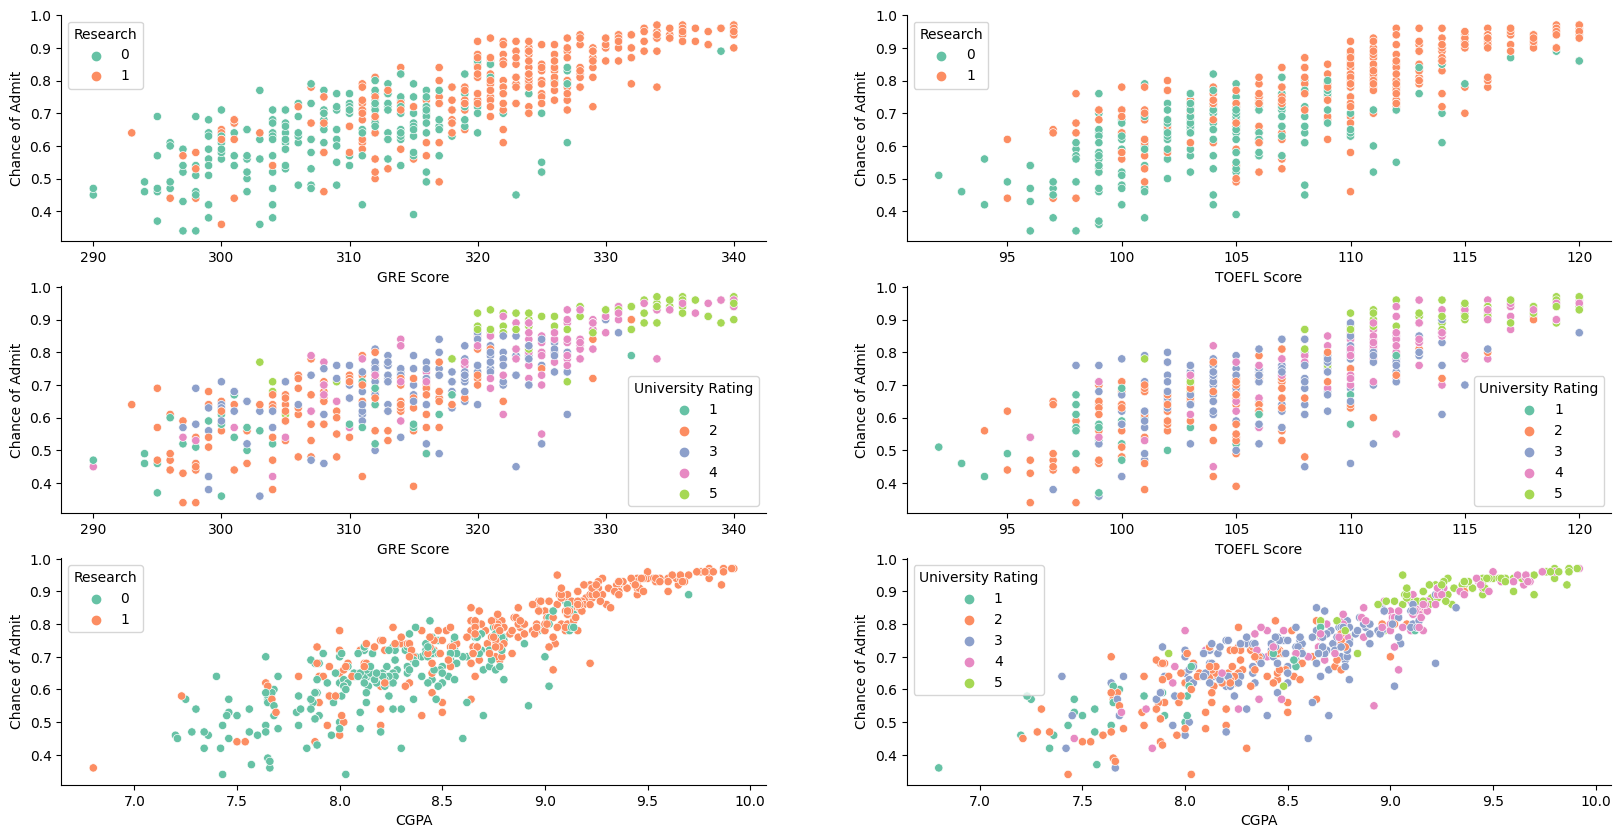

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.scatterplot(x=df['GRE Score'], y=df['Chance of Admit'],hue=df['Research'], ax=ax[0,0],palette='Set2')
sns.scatterplot(x=df['TOEFL Score'], y=df['Chance of Admit'],hue=df['Research'], ax=ax[0,1],palette='Set2')
sns.scatterplot(x=df['GRE Score'], y=df['Chance of Admit'], hue=df['University Rating'], ax=ax[1,0],palette='Set2')
sns.scatterplot(x=df['TOEFL Score'], y=df['Chance of Admit'],hue=df['University Rating'], ax=ax[1,1],palette='Set2')
sns.scatterplot(x=df['CGPA'], y=df['Chance of Admit'], hue=df['Research'],ax=ax[2,0],palette='Set2')
sns.scatterplot(x=df['CGPA'], y=df['Chance of Admit'], hue=df['University Rating'], ax=ax[2,1],palette='Set2')
sns.despine()
plt.show()

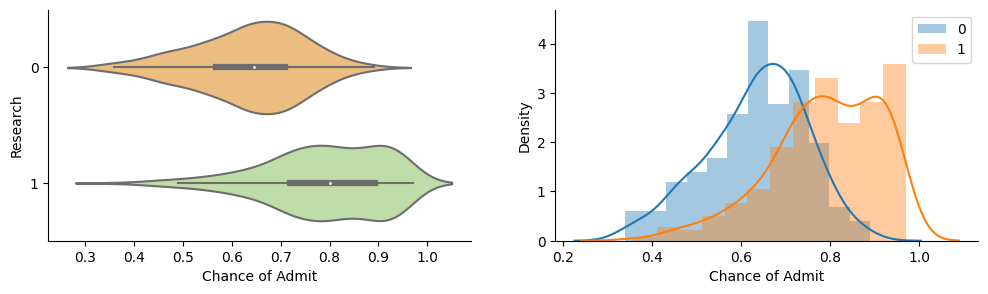

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,3))
sns.violinplot(y=df['Research'], x=df['Chance of Admit'], orient='h', ax=ax[0],palette='Spectral')
sns.distplot(df[df['Research']==0]['Chance of Admit'], ax = ax[1], label='0')
sns.distplot(df[df['Research']==1]['Chance of Admit'], ax = ax[1], label='1')
ax[1].legend()
sns.despine()
plt.show()

Multivariate Analysis

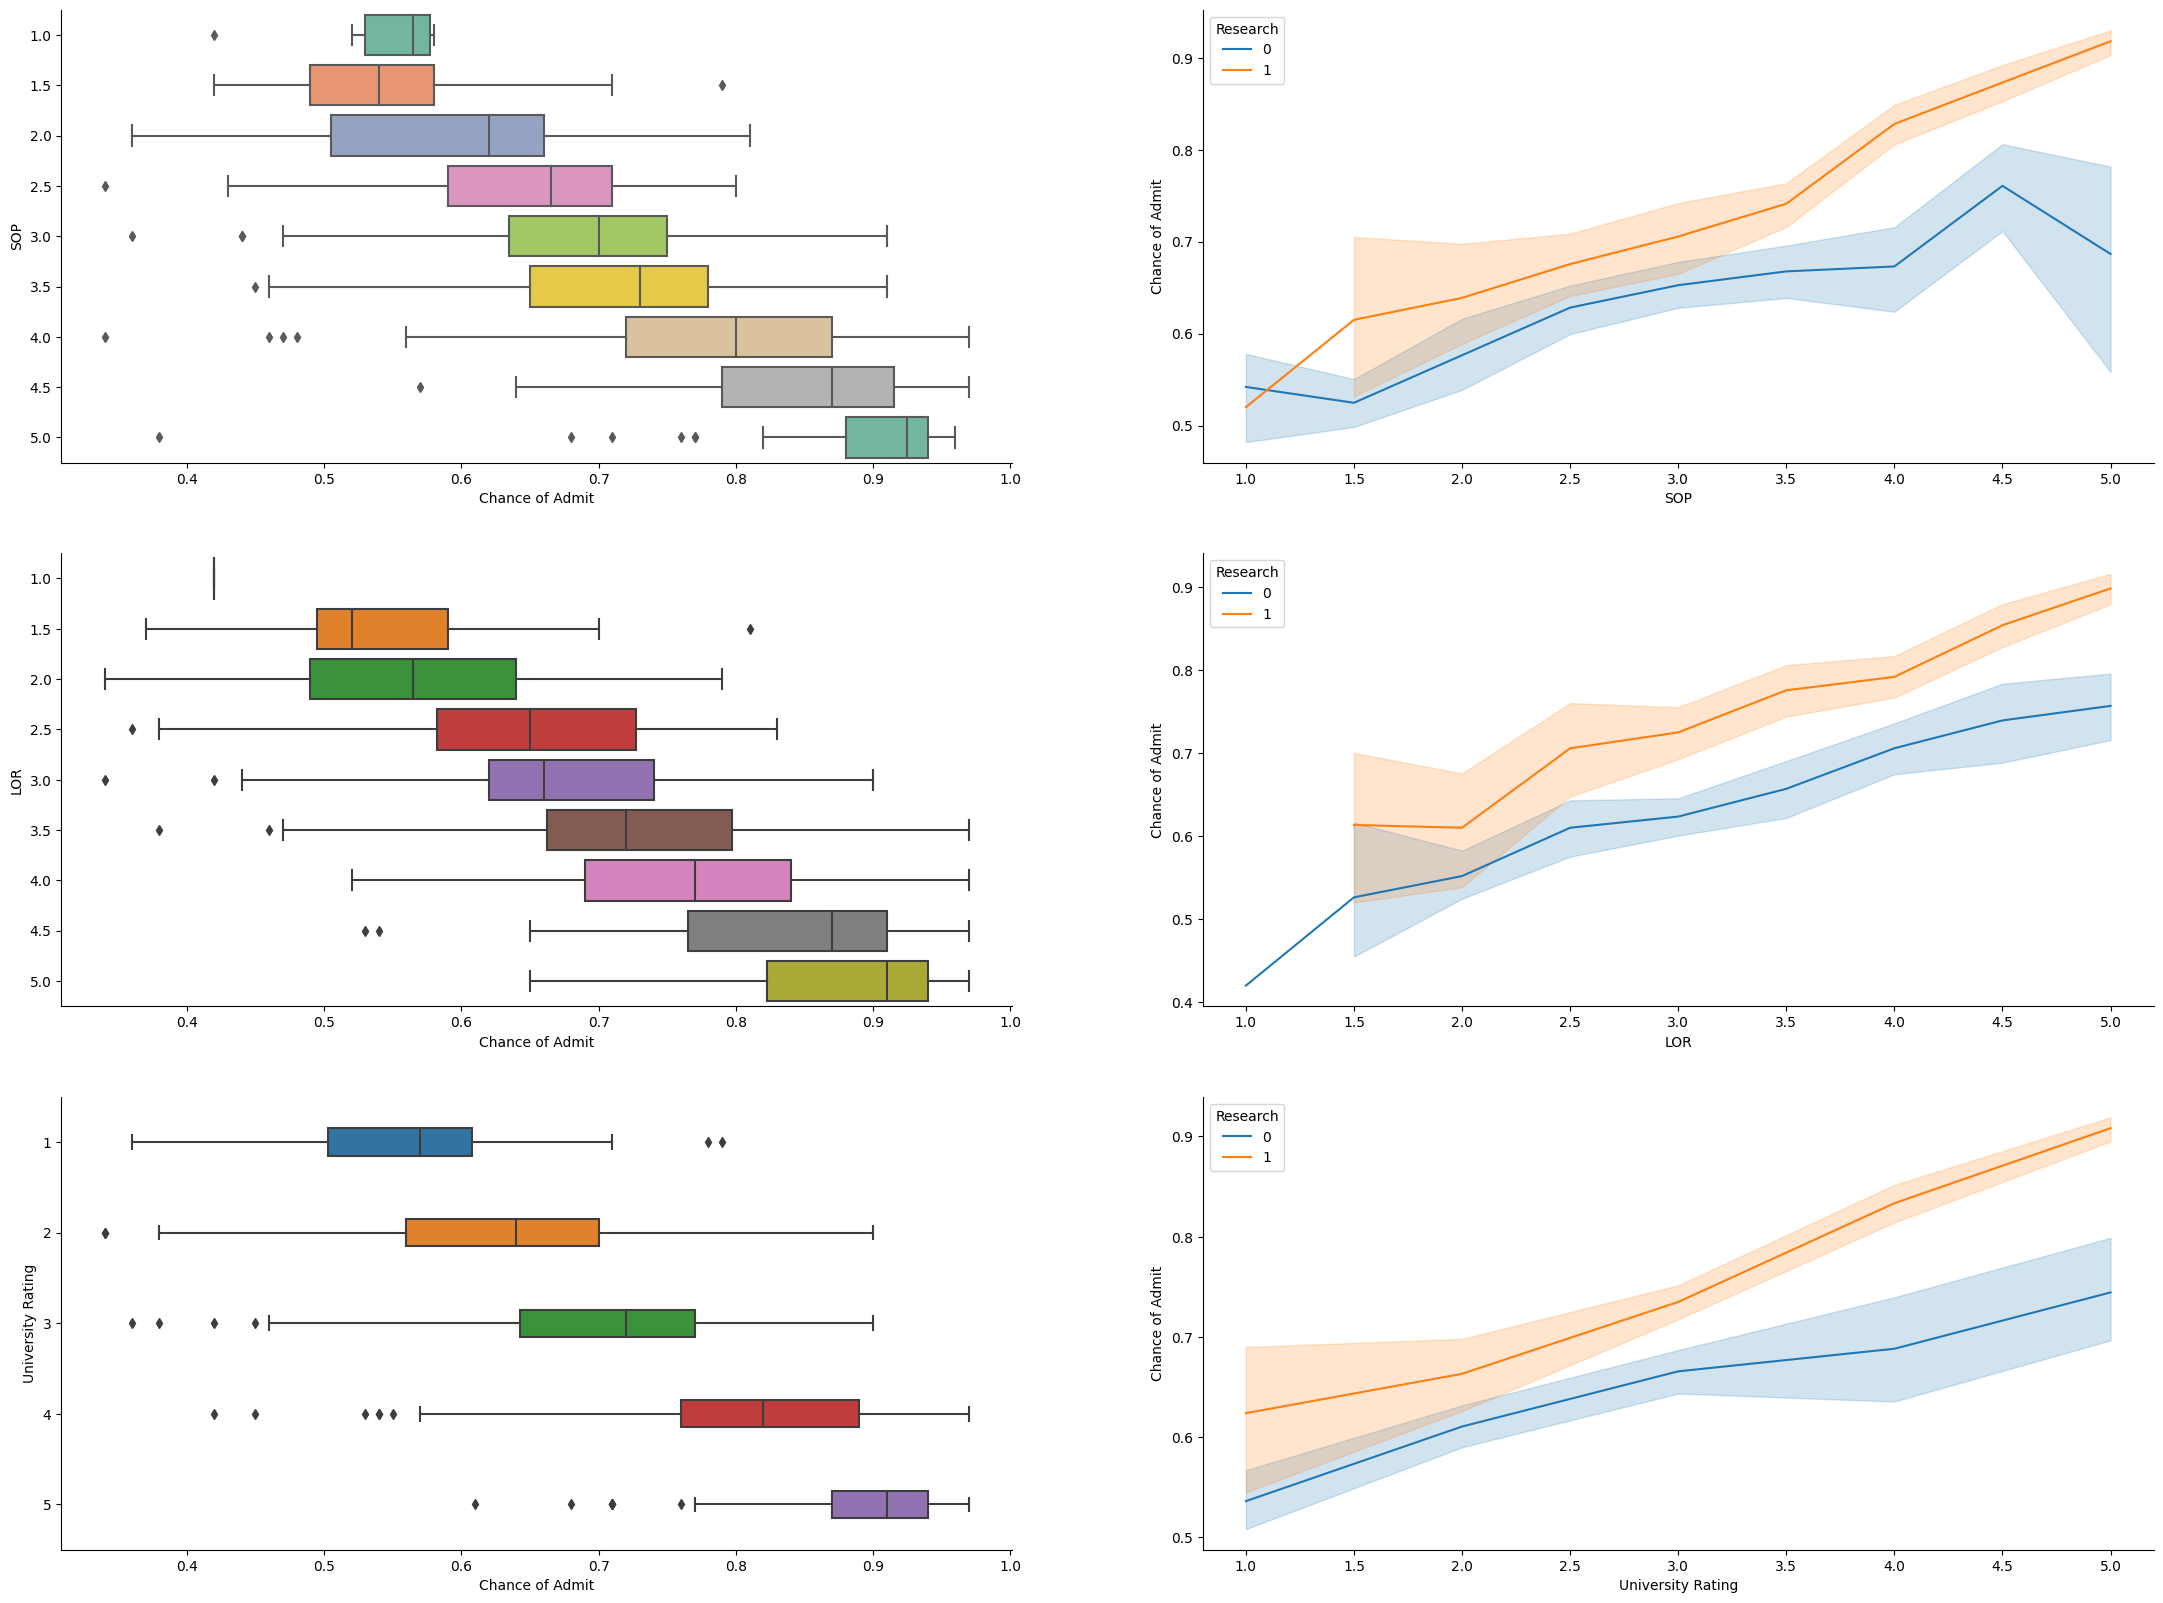

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(27,20))
sns.boxplot(y=df['SOP'], x=df['Chance of Admit'], orient='h', ax=ax[0,0],palette='Set2')

sns.lineplot(x=df['SOP'],y=df['Chance of Admit'],ax=ax[0,1],hue=df['Research'])
sns.boxplot(y=df['LOR'], x=df['Chance of Admit'], orient='h', ax=ax[1,0])

sns.lineplot(x=df['LOR'],y=df['Chance of Admit'],ax=ax[1,1],hue=df['Research'])
sns.boxplot(y=df['University Rating'], x=df['Chance of Admit'], orient='h',width=0.3, ax=ax[2,0])

sns.lineplot(x=df['University Rating'],y=df['Chance of Admit'],ax=ax[2,1],hue=df['Research'])
sns.despine()
plt.show()

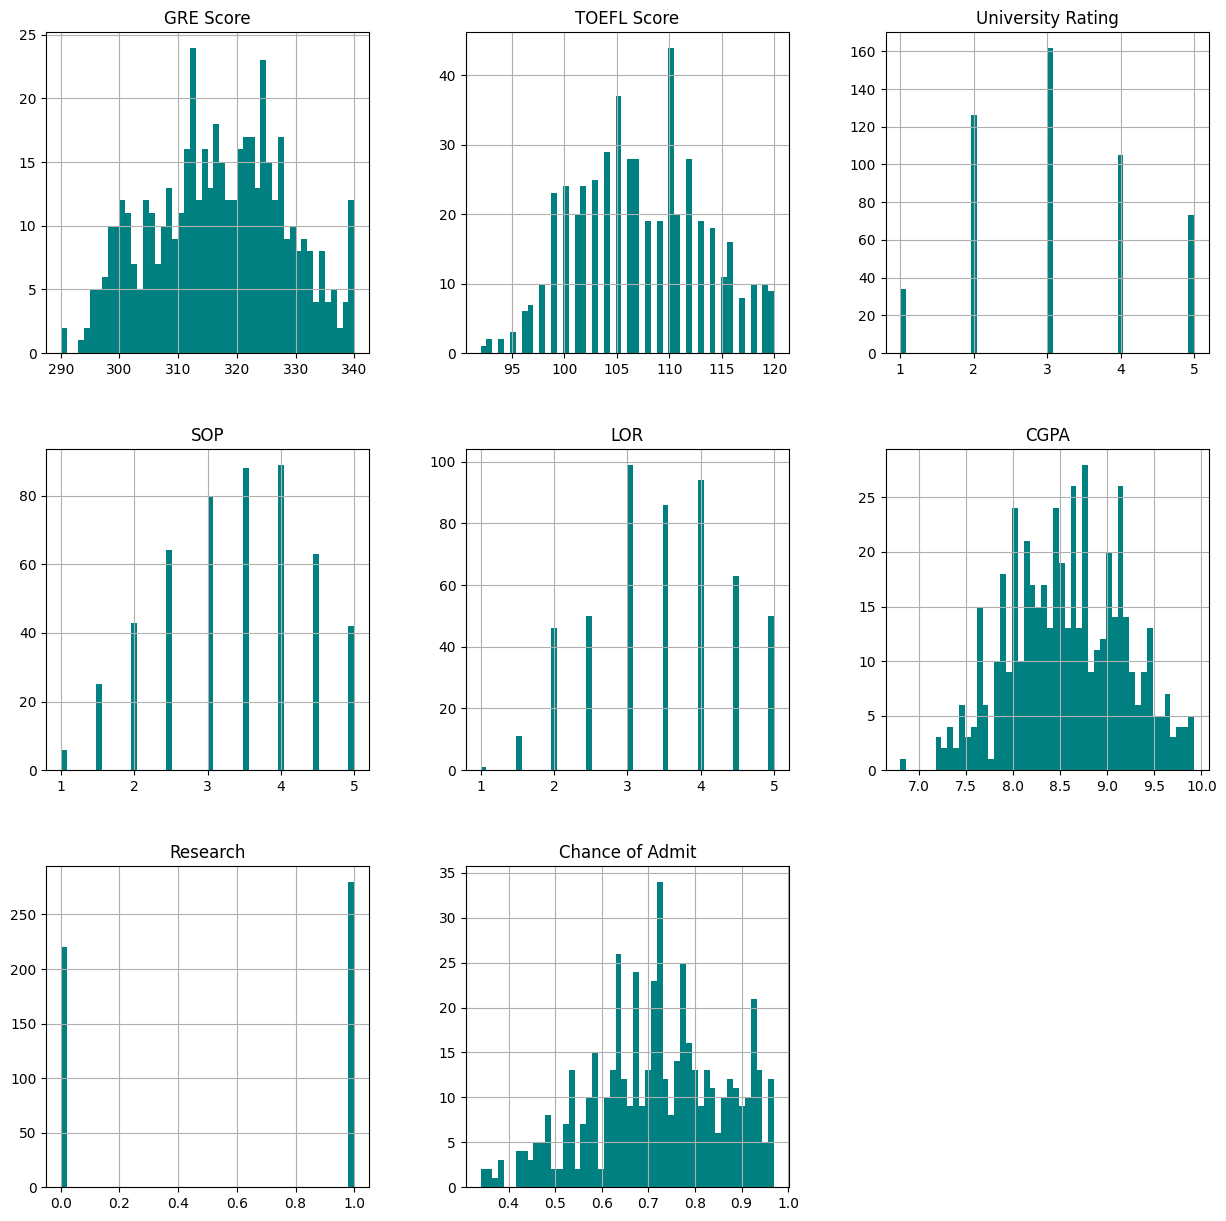

In [ ]:
df.hist(color='teal',figsize=(15,15),bins=50)
plt.show()

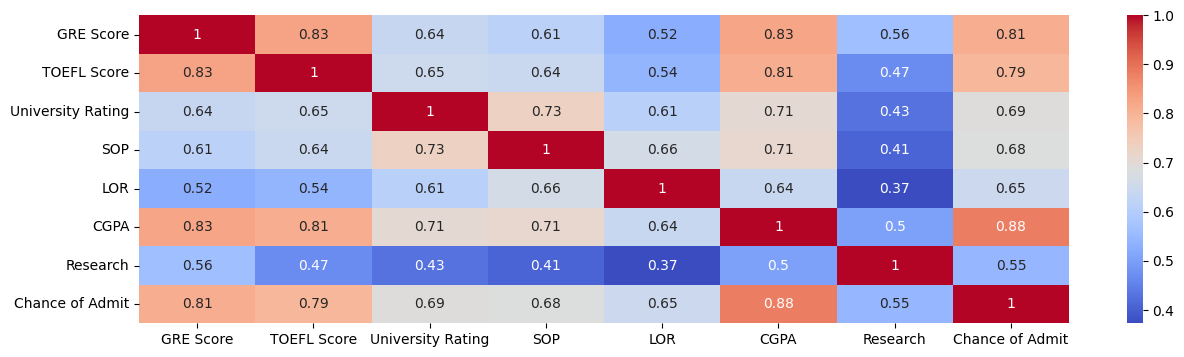

In [ ]:
df_corr = df.corr()
plt.figure(figsize=(15,4))
sns.heatmap(df_corr,annot=True, cmap='coolwarm')
plt.show()

-Chance of Admit shows strong correlation with GRE Score, TOEFL Score and CGPA.
- Research shows 0.5 correlation with GRE Score, CGPA as well as chance of Admit meaning researchers are
- SOP is increasing with LOR.
- GRE Score and TOEFL Score share a strong correlation meaning that students who are performing well in GRE are also doing doing well
with TOEFL.
- CGPA shares a strong correlation with GRE as well as TOEFL Score as better scores increses CGPA of a student.

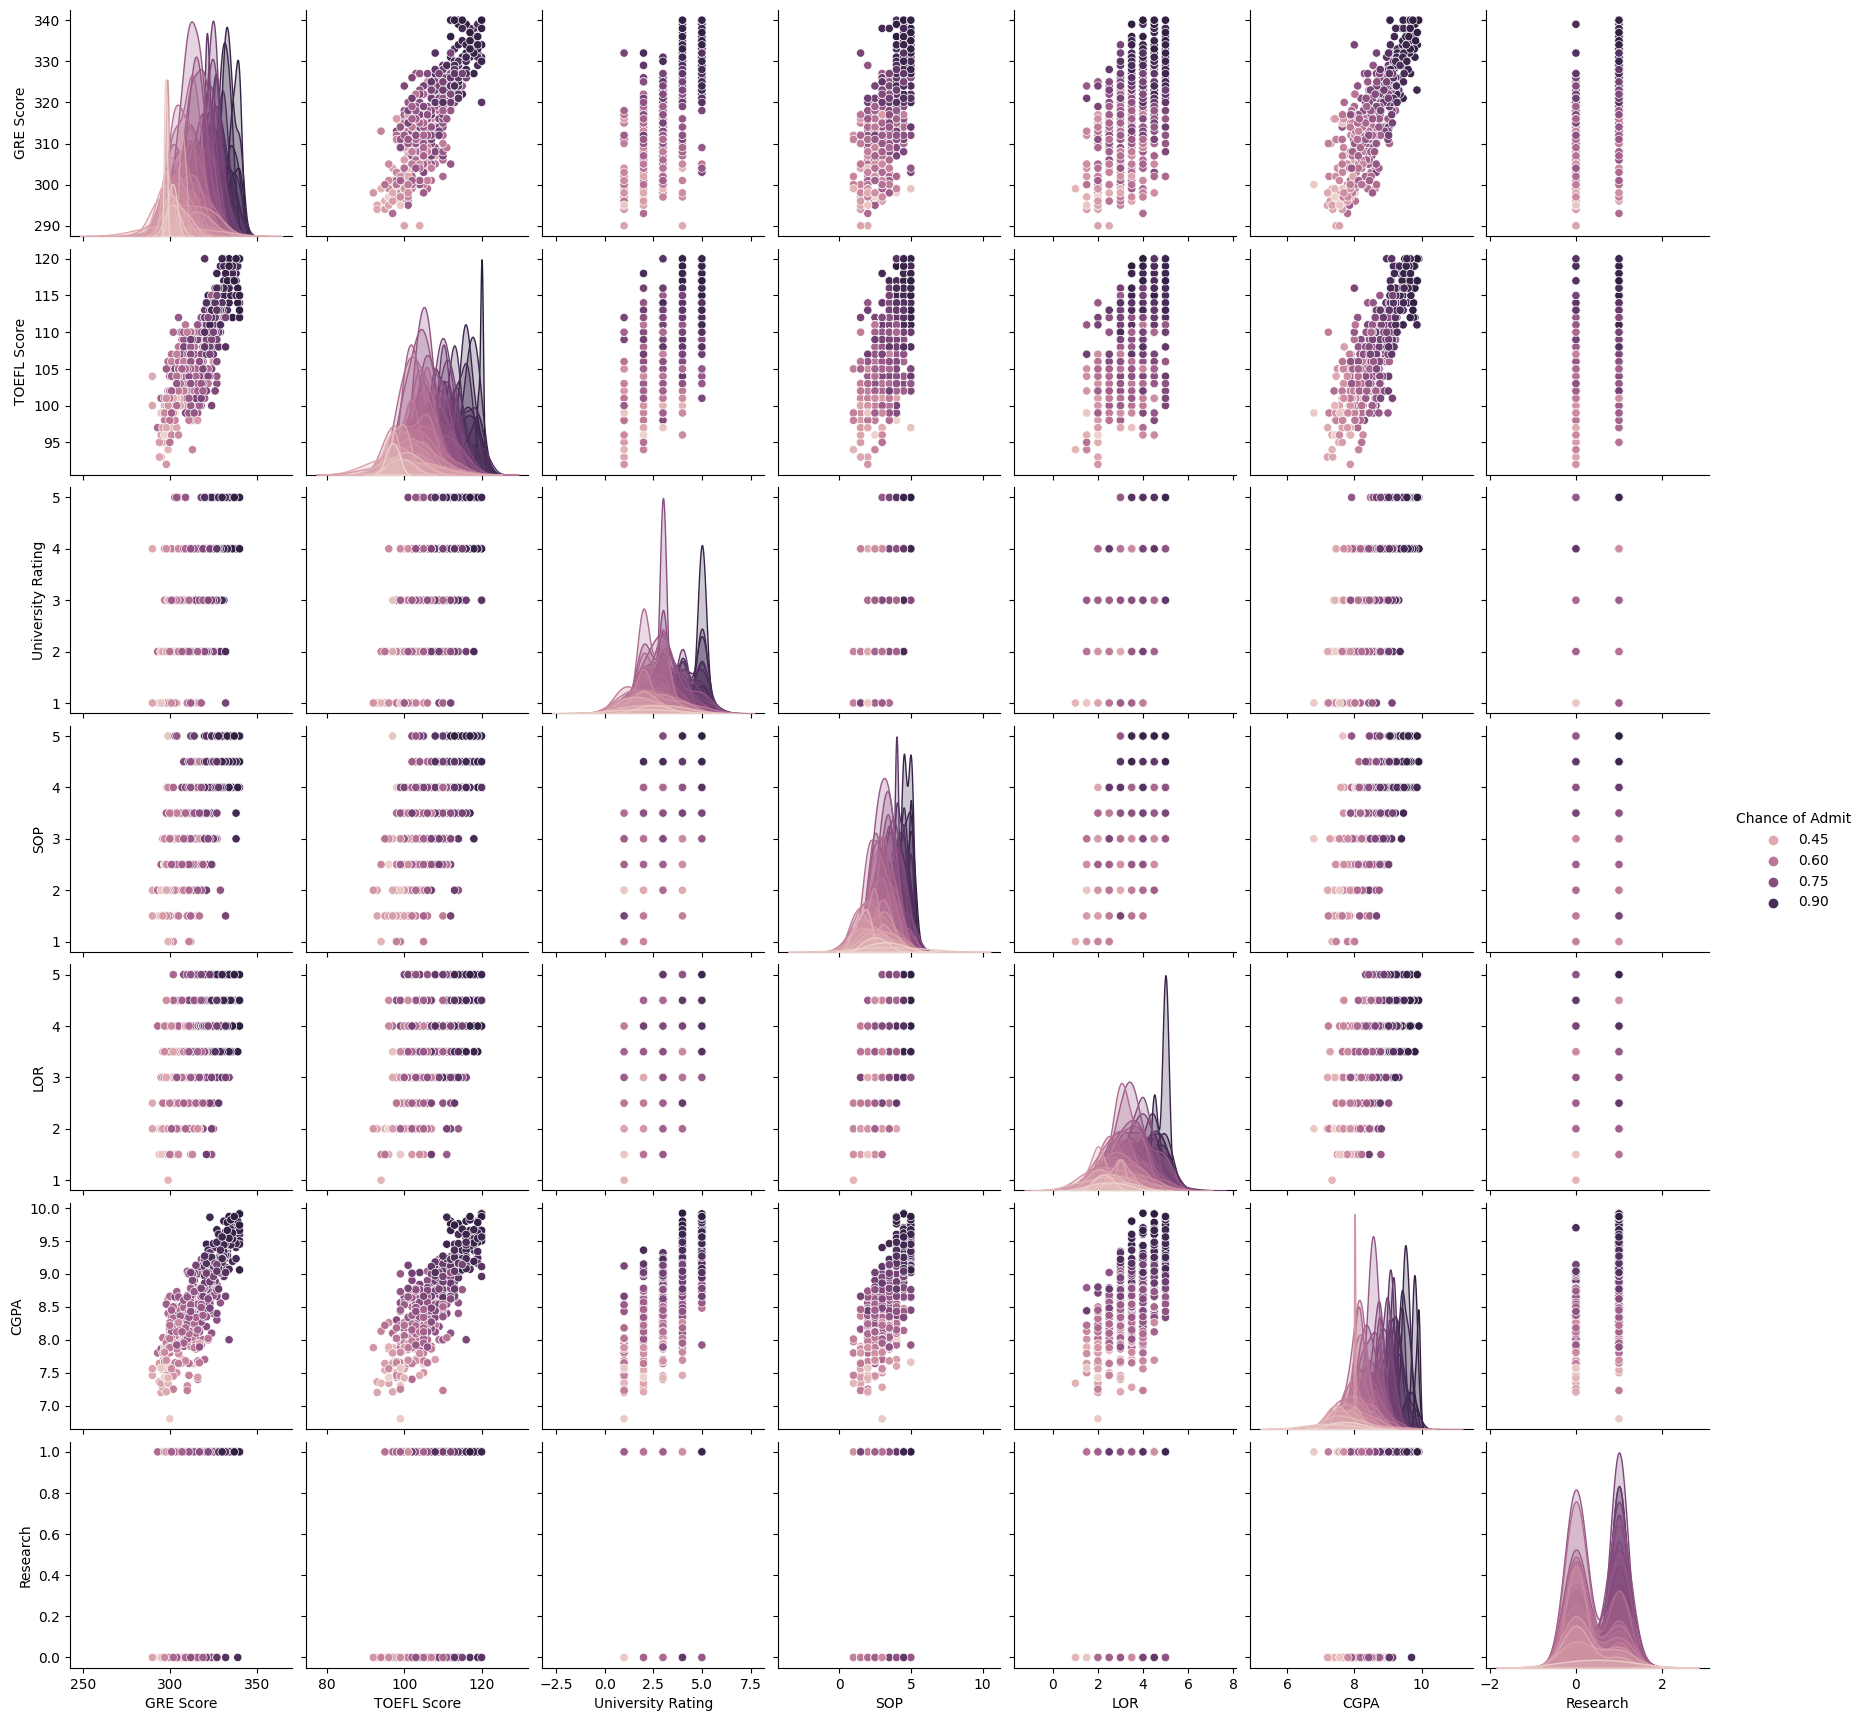

In [ ]:
sns.pairplot(data=df,hue='Chance of Admit')
plt.show()

* As University Ratings increases, GRE scores and TOEFL score increses.

* The student who received maximum scores in GRE scores and TOEFL scores got University Rating as 4 and 5.

* University Rating '4' given to both GRE and TOEFL scorers follows notibly same distribution.

* Maximum marks scored by GRE students received University Rating as '4' and '5'.

* Maximum number of students doing research received a University Rating of 3.

* Non-Research increases till University Rating 3 and then declines.

* LOR increases with SOP.

* Research column don't have a very big impact on chance of admit, by seeing the marginal score we can drop it. after inferencing.

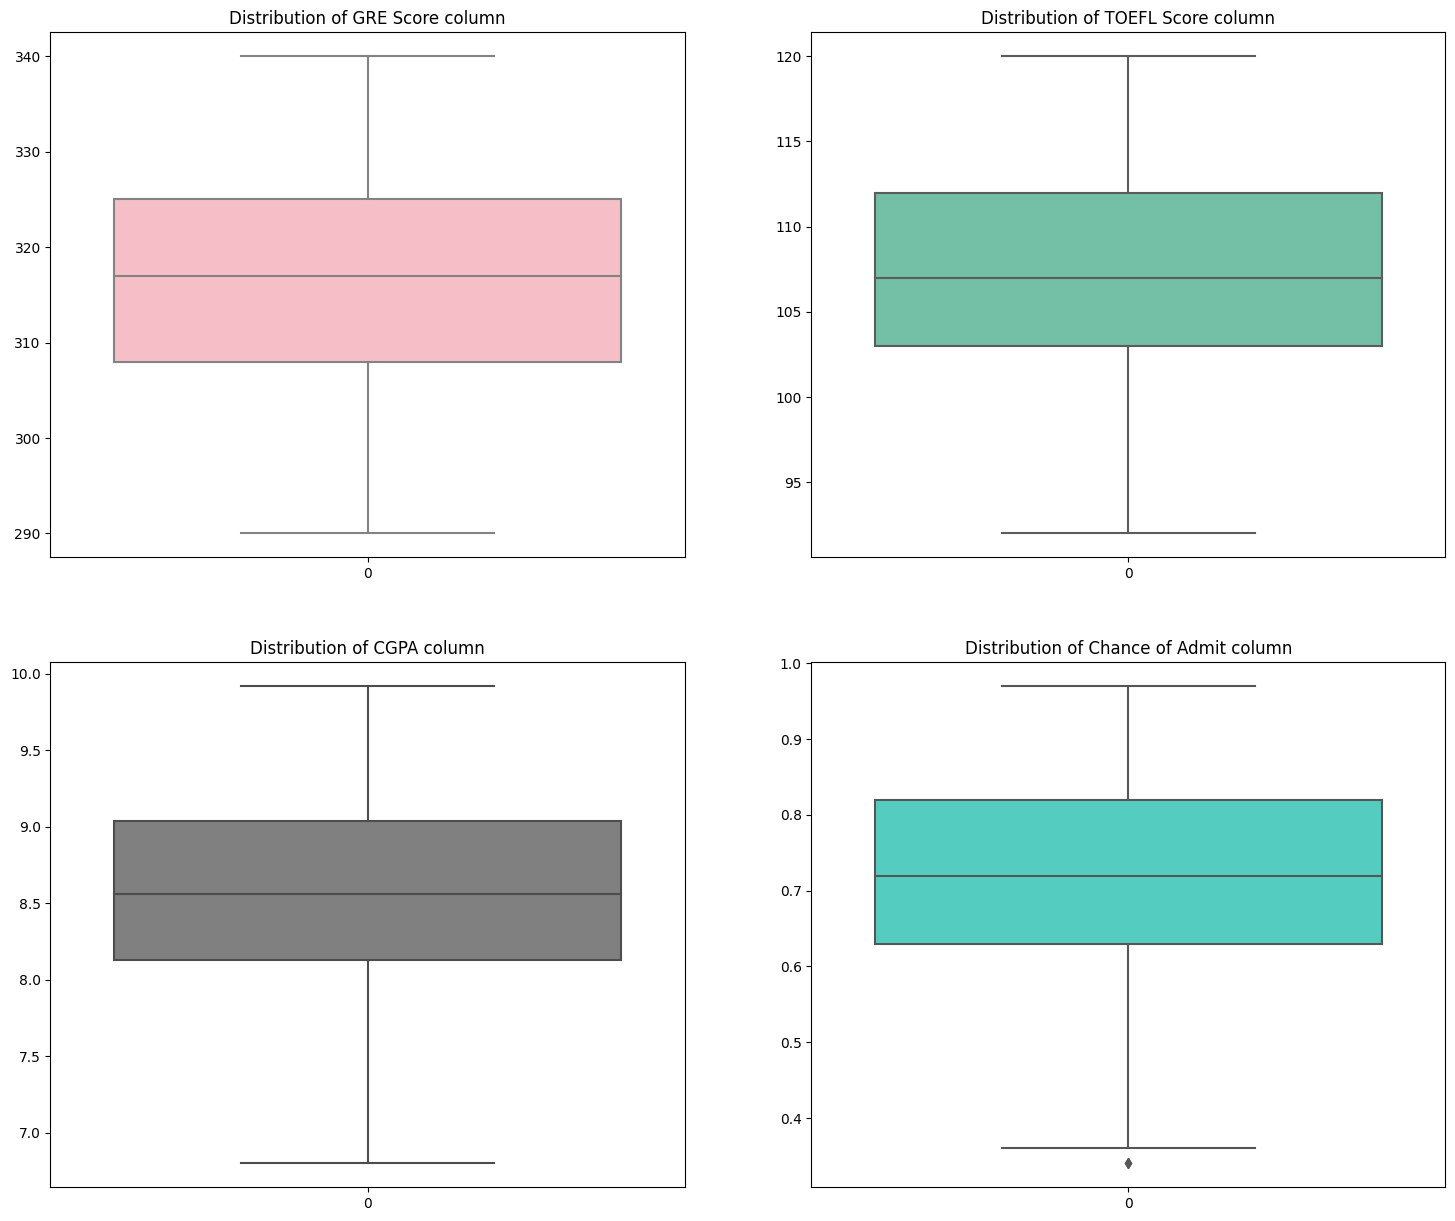

In [ ]:
numerical_columns = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit']

plt.figure(figsize = (18, 15))
for i in range(len(numerical_columns)):
    plt.subplot(2, 2, i + 1)
    clr = np.random.choice(list(mpl.colors.cnames))
    sns.boxplot(df[numerical_columns[i]], color = clr)
    plt.title(f"Distribution of {numerical_columns[i]} column")
    plt.plot()

In [ ]:
# Detecting Outliers

for i in numerical_columns:
    Q1 = np.quantile(df[i], 0.25)
    Q3 = np.quantile(df[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df.loc[(df[i] < LB) | (df[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : GRE Score
Q1 : 308.0
Q3 : 325.0
IQR : 17.0
LB : 282.5
UB : 350.5
Number of outliers : 0
----------------------------------
Column : TOEFL Score
Q1 : 103.0
Q3 : 112.0
IQR : 9.0
LB : 89.5
UB : 125.5
Number of outliers : 0
----------------------------------
Column : CGPA
Q1 : 8.127500000000001
Q3 : 9.04
IQR : 0.9124999999999979
LB : 6.7587500000000045
UB : 10.408749999999996
Number of outliers : 0
----------------------------------
Column : Chance of Admit
Q1 : 0.63
Q3 : 0.82
IQR : 0.18999999999999995
LB : 0.3450000000000001
UB : 1.105
Number of outliers : 2
----------------------------------


In [ ]:
bins = [0, 0.4, 0.7, 1.0]
labels = ['Low', 'Medium', 'High']
df['Admit Likelihood'] = pd.cut(df['Chance of Admit'], bins=bins, labels=labels)

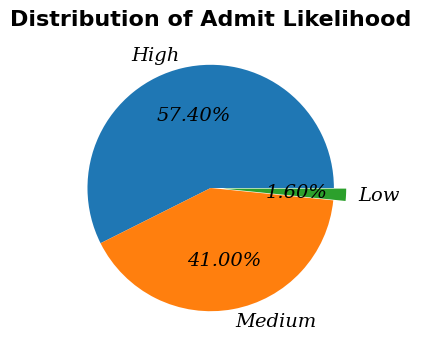

In [ ]:
# Count the number of occurrences in each bin
admit_likelihood_counts = df['Admit Likelihood'].value_counts()

# Create a pie chart with custom styling
plt.figure(figsize=(4, 4))
plt.pie(x=admit_likelihood_counts.values, labels=admit_likelihood_counts.index,
        explode=[0, 0, 0.1], autopct='%.2f%%',
        textprops={'fontsize': 14, 'fontstyle': 'oblique', 'fontfamily': 'serif', 'fontweight': 500})
plt.title('Distribution of Admit Likelihood', fontsize=16, fontweight='bold')
plt.show()

* 57.40 % students has the chance to admit
* 41.00 % students has the chance to admit
* 1.60  % students has the chance to admit

In [ ]:
bins = [0,7.4, 9.0, 10.0]
labels = ['second_class', 'First_class', 'Excellent']
df['CGPA_Grade'] = pd.cut(df['CGPA'], bins=bins, labels=labels)

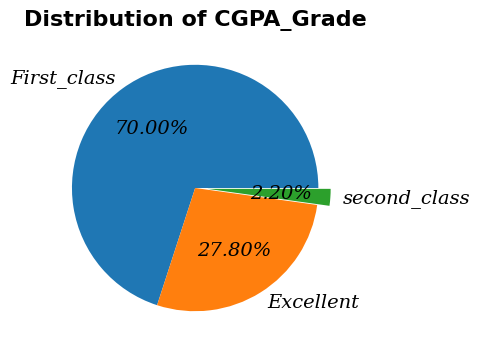

In [ ]:
# Count the number of occurrences in each bin
CGPA_Grade_counts = df['CGPA_Grade'].value_counts()

# Create a pie chart with custom styling
plt.figure(figsize=(4, 4))
plt.pie(x=CGPA_Grade_counts.values, labels=CGPA_Grade_counts.index,
        explode=[0, 0,0.1], autopct='%.2f%%',
        textprops={'fontsize': 14, 'fontstyle': 'oblique', 'fontfamily': 'serif', 'fontweight': 500})
plt.title('Distribution of CGPA_Grade', fontsize=16, fontweight='bold')
plt.show()

* 70 % of student pass in first class
* 27.8 % of student pass in first class and performed well

Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [ ]:
df1 = pd.read_csv('Jamboree_Admission.csv')
df1.head(3)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72

In [ ]:
df1.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [ ]:
# drop Serial NO. column
df1 = df1.drop(columns=['Serial No.'], axis=1)

In [ ]:
df1['University Rating'] = df1.groupby('University Rating')['Chance of Admit'].transform('mean')
df1['SOP'] = df1.groupby('SOP')['Chance of Admit'].transform('mean')
df1['LOR'] = df1.groupby('LOR')['Chance of Admit'].transform('mean')
df1['Research'] = df1.groupby('Research')['Chance of Admit'].transform('mean')
df1.head()

GRE Score  TOEFL Score  University Rating       SOP       LOR  CGPA  \
0        337          118           0.801619  0.850000  0.831905  9.65   
1        324          107           0.801619  0.782809  0.831905  8.87   
2        316          104           0.702901  0.678500  0.723023  8.00   
3        322          110           0.702901  0.712045  0.640600  8.67   
4        314          103           0.626111  0.589535  0.668485  8.21   

   Research  Chance of Admit  
0  0.789964             0.92  
1  0.789964             0.76  
2  0.789964             0.72  
3  0.789964             0.80  
4  0.634909             0.65

In [ ]:
le = LabelEncoder()
df1['University Rating'] = le.fit_transform(df1['University Rating'])
df1['SOP'] = le.fit_transform(df1['SOP'])
df1['LOR'] = le.fit_transform(df1['LOR'])
df1.tail()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
495        332          108                  4    7    6  9.02  0.789964   
496        337          117                  4    8    8  9.87  0.789964   
497        330          120                  4    7    8  9.56  0.789964   
498        312          103                  3    6    8  8.43  0.634909   
499        327          113                  3    7    7  9.04  0.634909   

     Chance of Admit  
495             0.87  
496             0.96  
497             0.93  
498             0.73  
499             0.84

[]

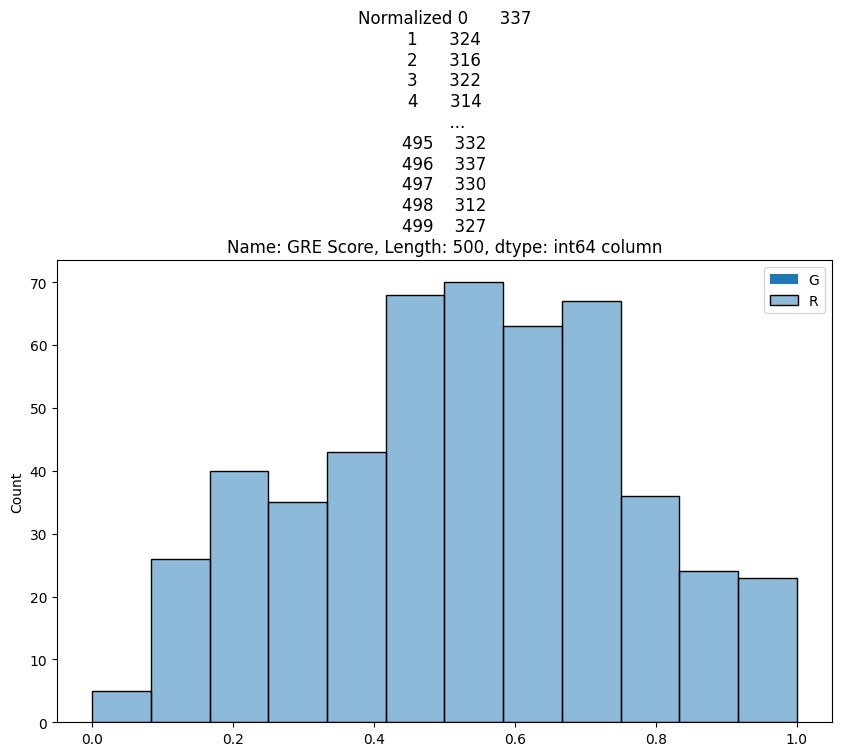

In [ ]:

plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1['GRE Score'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df1['GRE Score']} column")
plt.legend('GRE Score')
plt.plot()

[]

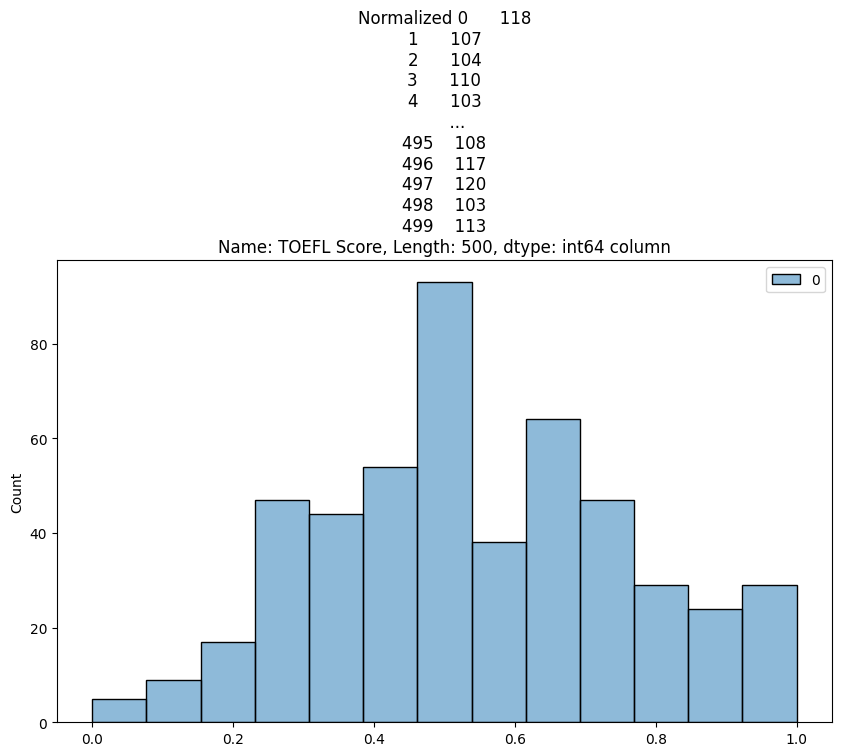

In [ ]:

plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1['TOEFL Score'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df1['TOEFL Score']} column")
plt.plot()

[]

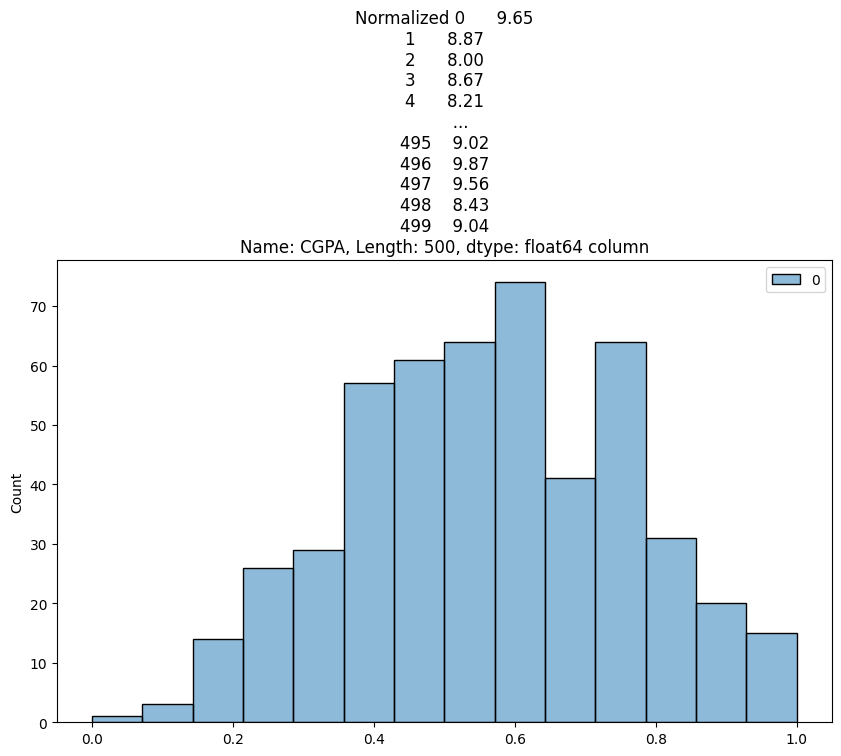

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1['CGPA'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df1['CGPA']} column")
plt.plot()

[]

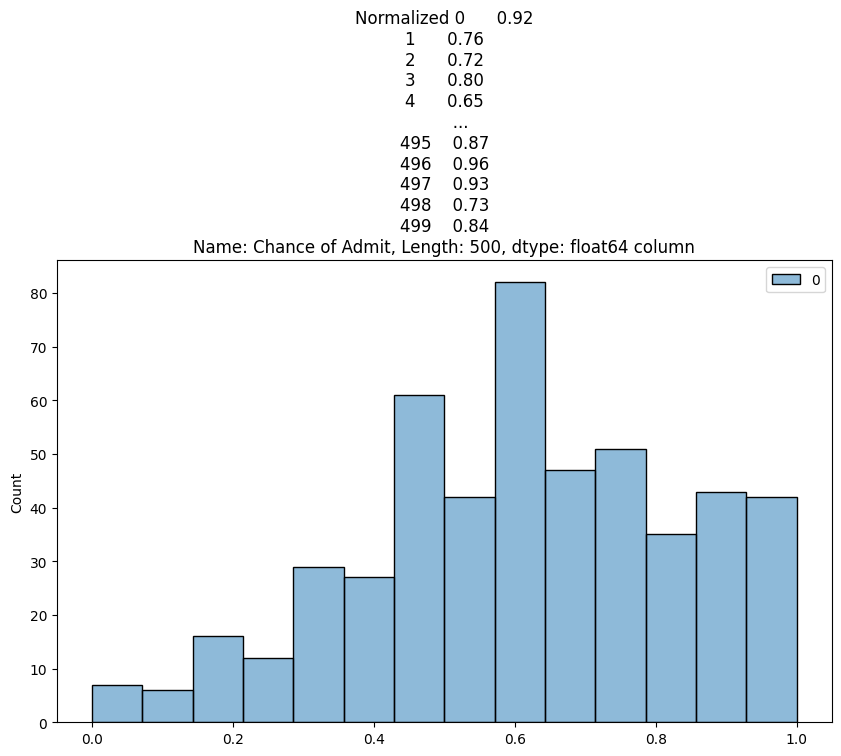

In [ ]:
plt.figure(figsize = (10, 6))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1['Chance of Admit'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df1['Chance of Admit']} column")
plt.plot()

[]

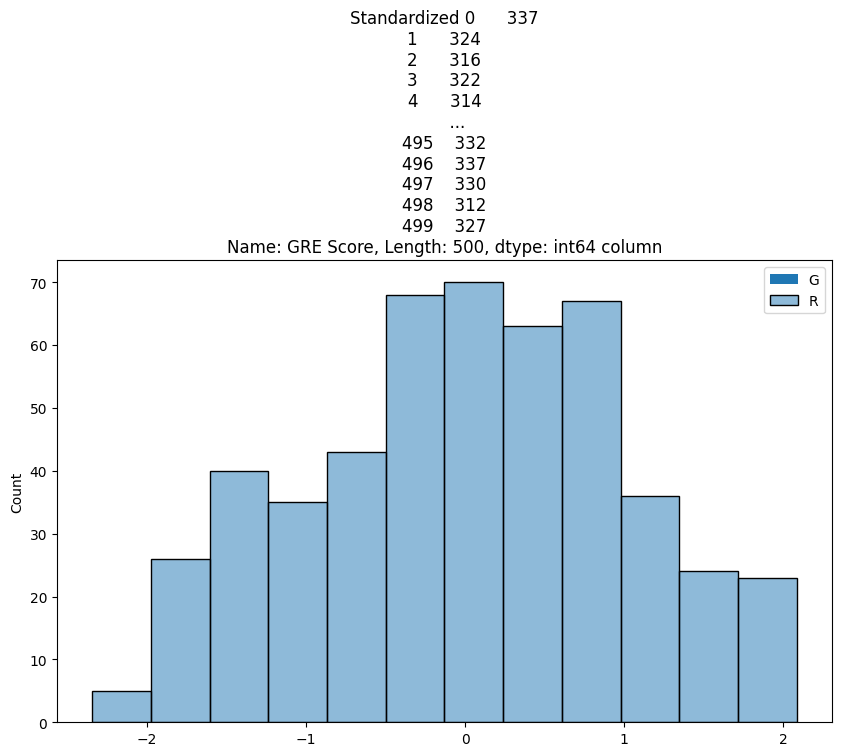

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df1['GRE Score'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df1['GRE Score']} column")
plt.legend('GRE Score')
plt.plot()

[]

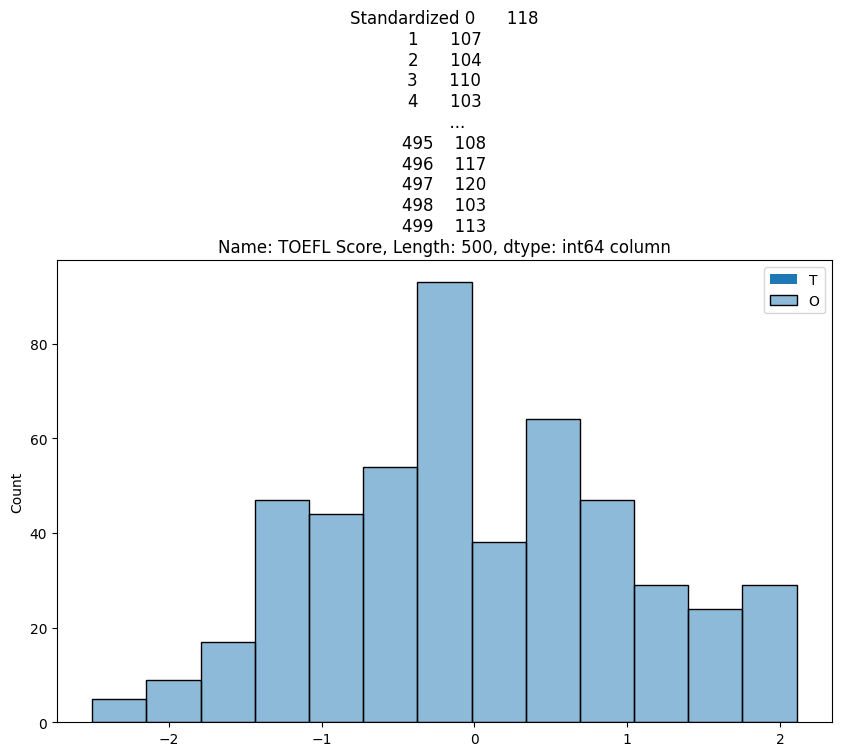

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df1['TOEFL Score'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df1['TOEFL Score']} column")
plt.legend('TOEFL Score')
plt.plot()

[]

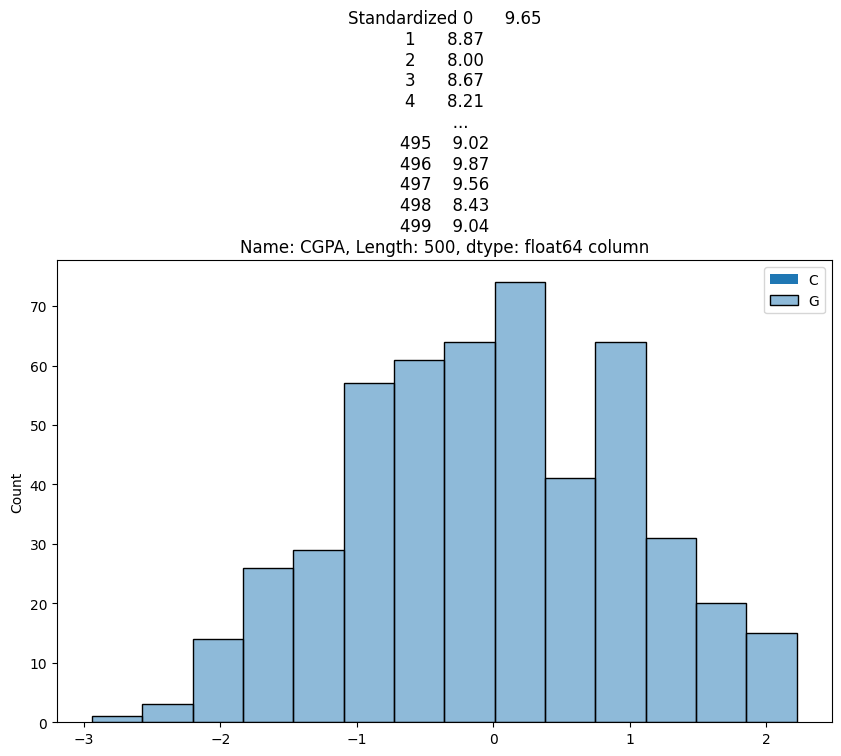

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df1['CGPA'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df1['CGPA']} column")
plt.legend('CGPA')
plt.plot()

[]

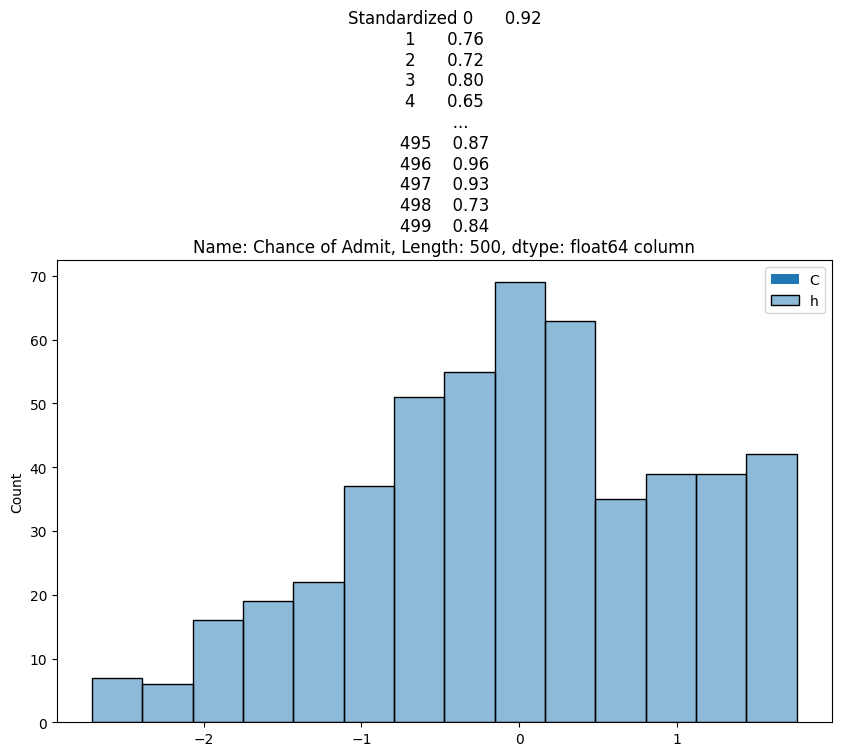

In [ ]:
plt.figure(figsize = (10, 6))
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df1['Chance of Admit'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df1['Chance of Admit']} column")
plt.legend('Chance of Admit')
plt.plot()

In [ ]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit'

# linear regression

In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)
df = df.drop(columns=['Serial No.'], axis=1)
df.head(3)

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  4  4.5  4.5  9.65         1   
1        324          107                  4  4.0  4.5  8.87         1   
2        316          104                  3  3.0  3.5  8.00         1   

   Chance of Admit  
0             0.92  
1             0.76  
2             0.72

In [ ]:
X = df.drop(columns=[target])
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
# standardize the dataset
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(350, 7) (350,)
(150, 7) (150,)


In [ ]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)

    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
    }
    return res

In [ ]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1.0):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)

    print(f"\n----   {model_name.title()} Regression Model  ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")
    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

In [ ]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.82
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: -1.216113117446596
              Column      Coef
0          GRE Score  0.001653
1        TOEFL Score  0.003815
2  University Rating  0.010123
3                SOP -0.001010
4                LOR  0.013517
5               CGPA  0.107034
6           Research  0.028140
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.81
Train Adjusted_R2: 0.82 Test Adjusted_R2: 0.81
Intercept: -1.2232736673157225
              Column      Coef
0          GRE Score  0.001738
1        TOEFL Score  0.003913
2  University Rating  0.010272
3                SOP -0.000626
4                LOR  0.013750
5               CGPA  0.103241
6           Research  0.027928
-----------

Lasso(alpha=0.001)

In [ ]:
X_sm = sm.add_constant(X_train) ## Statmodels default is without intercept, to add intercept we need to add constant

model = sm.OLS(y_train, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     224.1
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          1.27e-123
Time:                        11:00:34   Log-Likelihood:                 500.20
No. Observations:                 350   AIC:                            -984.4
Df Residuals:                     342   BIC:                            -953.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2161      0.12

In [ ]:
li_reg = LinearRegression()
li_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'The coefficient for linear regression: {li_reg.coef_}')
print()
print(f'The intercept for linear regression: {li_reg.intercept_}')

The coefficient for linear regression: [ 0.00165342  0.00381453  0.01012349 -0.00100952  0.01351732  0.10703419
  0.02813965]

The intercept for linear regression: -1.216113117446596


{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


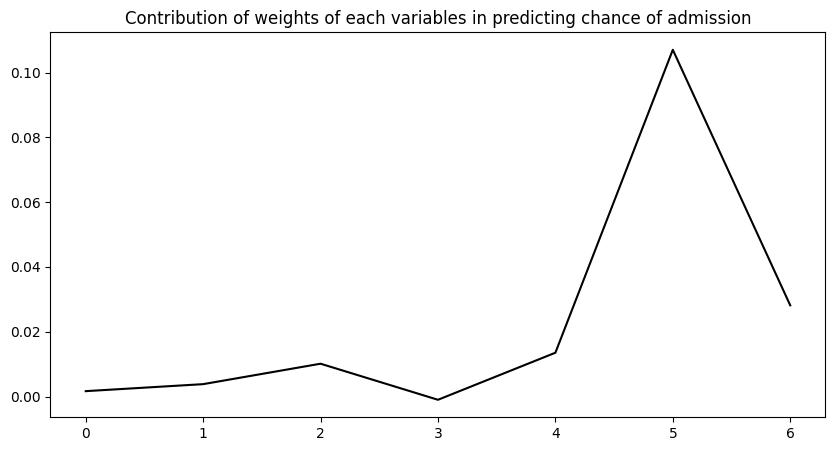

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Contribution of weights of each variables in predicting chance of admission')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.plot(li_reg.coef_, color='black')

CGPA claims the highest Weightage in coeffieints among all variable during Linear Regression

In [ ]:
y_predict = li_reg.predict(X_test)

In [ ]:
print('The score of Linear Regression for Training Data:',li_reg.score(X_train,y_train))
print('-'*100)
print('The score of Linear Regression for Test Data:',li_reg.score(X_test,y_test))
print('-'*100)
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=y_predict))
print('-'*100)
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=y_predict,squared=False))
print('-'*100)
print('R^2:',r2_score(y_test,y_predict))
print('-'*100)
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,y_predict)))*(len(y)-1)/(len(y)-x.shape[1]-1)))
print('-'*100)

The score of Linear Regression for Training Data: 0.8209843725364347
----------------------------------------------------------------------------------------------------
The score of Linear Regression for Test Data: 0.8157672116057977
----------------------------------------------------------------------------------------------------
Mean Absolute error: 0.043975442403391976
----------------------------------------------------------------------------------------------------
Root Mean Squared Error: 0.06423343550447698
----------------------------------------------------------------------------------------------------
R^2: 0.8157672116057977
----------------------------------------------------------------------------------------------------
Adjusted R^2:  0.8116144233428136
----------------------------------------------------------------------------------------------------


REGULARIZATION(L2) - RIDGE REGRESSION

In [ ]:
reg = Ridge(alpha=1)
reg.fit(X_train,y_train)
reg.coef_

array([ 0.0017378 ,  0.00391301,  0.01027212, -0.00062594,  0.01374955,
        0.10324073,  0.02792838])

In [ ]:
reg = Ridge(alpha=2)
reg.fit(X_train,y_train)
reg.coef_

array([ 0.00181692,  0.00400464,  0.01040955, -0.00026828,  0.01395907,
        0.0997186 ,  0.02770621])

In [ ]:
reg = Ridge(alpha=3)
reg.fit(X_train,y_train)
reg.coef_

array([1.89128474e-03, 4.09014216e-03, 1.05368692e-02, 6.60983400e-05,
       1.41483962e-02, 9.64394608e-02, 2.74755628e-02])

if 0 < α < ∞:

* The magnitude of α will decide the weightage given to different parts of objective.
* The coefficients will be somewhere between 0 and ones for simple linear regression.

* Will work with aplha = 3

In [ ]:
reg = Ridge(alpha=3)
reg.fit(X_train,y_train)

Ridge(alpha=3)

In [ ]:
print('Coefficients:',reg.coef_)
print()
print('Intercept:',reg.intercept_)

Coefficients: [1.89128474e-03 4.09014216e-03 1.05368692e-02 6.60983400e-05
 1.41483962e-02 9.64394608e-02 2.74755628e-02]

Intercept: -1.2367762491544494


In [ ]:
reg_pred = reg.predict(X_test)

Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Ridge Regression

In [ ]:
print('The score of Ridge Regression for Training Data:',reg.score(X_train,y_train),'.')
print('-'*100)
print('The score of Ridge Regression for Test Data:',reg.score(X_test,y_test),'.')
print('-'*100)
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=reg_pred),'.')       # defailt squared =True
print('-'*100)
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=reg_pred,squared=False),'.')
print('-'*100)
print('R^2:',r2_score(y_test,reg_pred),'.')
print('-'*100)
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,reg_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print('-'*100)

The score of Ridge Regression for Training Data: 0.8205161028743622 .
----------------------------------------------------------------------------------------------------
The score of Ridge Regression for Test Data: 0.8125479794485138 .
----------------------------------------------------------------------------------------------------
Mean Absolute error: 0.04436943323402147 .
----------------------------------------------------------------------------------------------------
Root Mean Squared Error: 0.06479220366876791 .
----------------------------------------------------------------------------------------------------
R^2: 0.8125479794485138 .
----------------------------------------------------------------------------------------------------
Adjusted R^2:  0.8083226265262466 .
----------------------------------------------------------------------------------------------------


{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


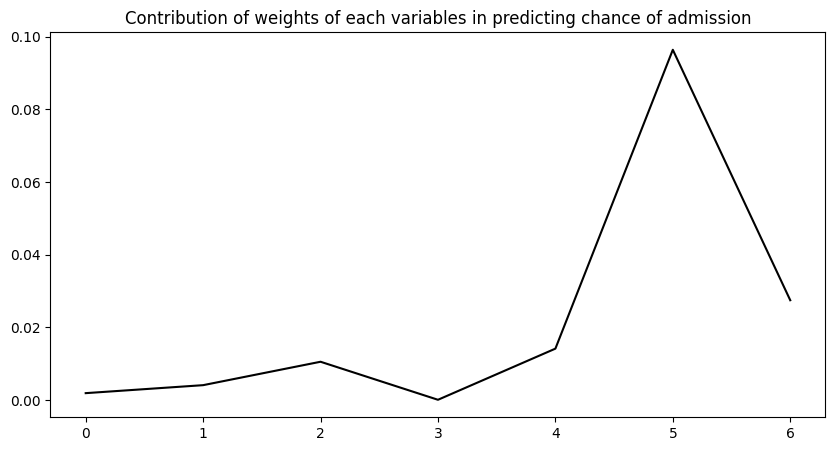

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Contribution of weights of each variables in predicting chance of admission')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.plot(reg.coef_, color='black')

REGULARIZATION(L1) - LASSO REGRESSION

CGPA holds the highest Weightage in coeffieints among all variable during Ridge Regularization.

In [ ]:
laso = Lasso(alpha=0.000001)
laso.fit(X_train,y_train)

Lasso(alpha=1e-06)

In [ ]:
print('Coefficients:',laso.coef_)
print()
print('Intercept:',laso.intercept_)

Coefficients: [ 0.00165386  0.00381468  0.01012154 -0.00100366  0.01351557  0.1070228
  0.0281347 ]

Intercept: -1.216175443263276


In [ ]:
laso_pred = laso.predict(X_test)

Checking MAE, Score, RSME, R^2 and Adjusted R^2 for Lasso Regression

In [ ]:
print('The score of Lasso Regression for Training Data:',laso.score(X_train,y_train),'.')
print('-'*100)
print('The score of Lasso Regression for Test Data:',laso.score(X_test,y_test),'.')
print('-'*100)
print('Mean Absolute error:',mean_absolute_error(y_true=y_test,y_pred=laso_pred),'.')       # defailt squared =True
print('-'*100)
print('Root Mean Squared Error:',mean_squared_error(y_true=y_test,y_pred=laso_pred,squared=False),'.')
print('-'*100)
print('R^2:',r2_score(y_test,laso_pred),'.')
print('-'*100)
print('Adjusted R^2: ',(1 - (1-(r2_score(y_test,laso_pred)))*(len(y)-1)/(len(y)-x.shape[1]-1)),'.')
print('-'*100)

The score of Lasso Regression for Training Data: 0.8209843711675893 .
----------------------------------------------------------------------------------------------------
The score of Lasso Regression for Test Data: 0.8157662933306227 .
----------------------------------------------------------------------------------------------------
Mean Absolute error: 0.043975349225663735 .
----------------------------------------------------------------------------------------------------
Root Mean Squared Error: 0.0642335955842767 .
----------------------------------------------------------------------------------------------------
R^2: 0.8157662933306227 .
----------------------------------------------------------------------------------------------------
Adjusted R^2:  0.811613484368813 .
----------------------------------------------------------------------------------------------------


{'0': 'GRE score', '1': 'TOEFL score', '2': 'University Rating', '3': 'SOP', '4': 'LOR', '5': 'CGPA', '6': 'Research'}


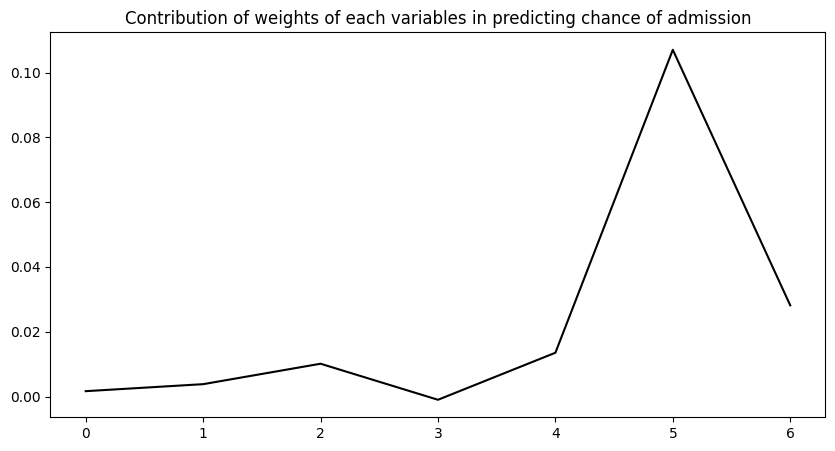

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Contribution of weights of each variables in predicting chance of admission')
print({'0':'GRE score','1':'TOEFL score','2':'University Rating','3':'SOP','4':'LOR','5':'CGPA','6':'Research'})
plt.plot(laso.coef_, color='black')

CGPA claims the highest Weightage in coeffieints among all variable during Lasso Regression.

Test the assumptions of linear regression

In [ ]:
def vif(newdf):
    # VIF dataframe
    vif_data = pd.DataFrame()
    vif_data["feature"] = newdf.columns

    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
                              for i in range(len(newdf.columns))]
    return vif_data

In [ ]:
res = vif(df.iloc[:,:-1])
res

feature          VIF
0          GRE Score  1308.061089
1        TOEFL Score  1215.951898
2  University Rating    20.933361
3                SOP    35.265006
4                LOR    30.911476
5               CGPA   950.817985
6           Research     2.869493

In [ ]:
# # drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

feature        VIF
0  University Rating  19.777410
1                SOP  33.625178
2                LOR  30.356252
3               CGPA  25.101796
4           Research   2.842227

In [ ]:
# Now lets drop the SOP and again calculate VIF
res = vif(df.iloc[:,2:-1].drop(columns=['SOP','University Rating','LOR']))
res

feature       VIF
0      CGPA  2.455008
1  Research  2.455008

In [ ]:
# now again train the model with these only two features
X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

 Ridge and Lasso regression

In [ ]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)


----   Linear Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247774222727991
     Column      Coef
0      CGPA  0.112050
1  Research  0.020205
--------------------------------------------------

----   Ridge Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247830300095277
     Column      Coef
0      CGPA  0.111630
1  Research  0.020362
--------------------------------------------------

----   Lasso Regression Model  ----

Train MAE: 0.05 Test MAE: 0.05
Train RMSE: 0.06 Test RMSE: 0.07
Train R2_score: 0.78 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7247713356661623
     Column      Coef
0      CGPA  0.111344
1  Research  0.019571
---------------------------------------

Lasso(alpha=0.001)

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

Compare the difference between od_total_time and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

STEP-1 : Set up Null Hypothesis bold text

Null Hypothesis ( H0 ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are same.

Alternate Hypothesis ( HA ) - od_total_time (Total Trip Time) and start_scan_to_end_scan (Expected total trip time) are different.

STEP-2 : Checking for basic assumpitons for the hypothesis bold text

Distribution check using QQ Plot Homogeneity of Variances using Lavene's test

STEP-3: Define Test statistics; Distribution of T under H0. bold text

If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

STEP-4: Compute the p-value and fix value of alpha. bold text

We set our alpha to be 0.05
STEP-5: Compare p-value and alpha. bold text

Based on p-value, we will accept or reject H0.

p-val > alpha : Accept H0
p-val < alpha : Reject H0

In [ ]:

df[['Research', 'CGPA']].describe()

Research        CGPA
count  500.000000  500.000000
mean     0.560000    8.576440
std      0.496884    0.604813
min      0.000000    6.800000
25%      0.000000    8.127500
50%      1.000000    8.560000
75%      1.000000    9.040000
max      1.000000    9.920000

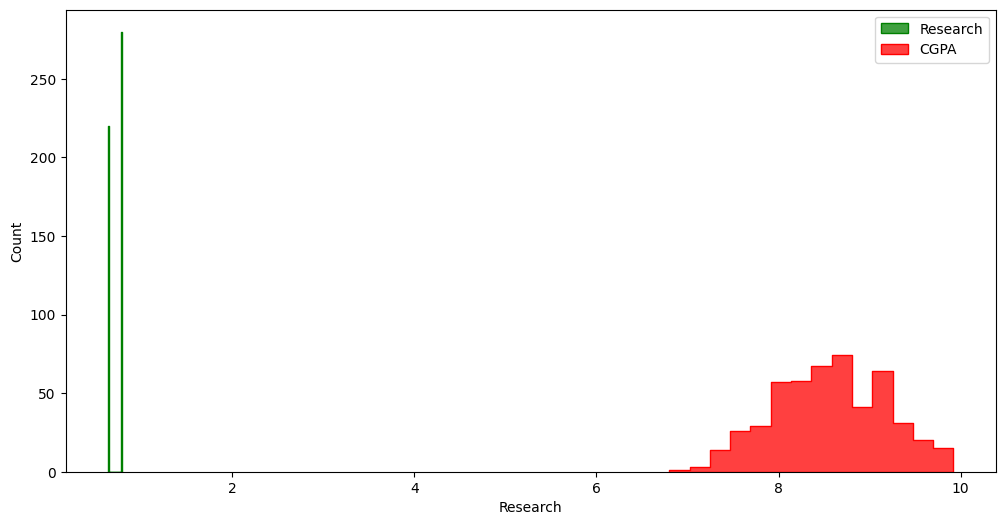

In [ ]:
plt.figure(figsize = (12, 6))
sns.histplot(df1['Research'], element = 'step', color = 'green')
sns.histplot(df1['CGPA'], element = 'step', color = 'red')
plt.legend(['Research', 'CGPA'])
plt.show()


Distribution check using QQ Plot

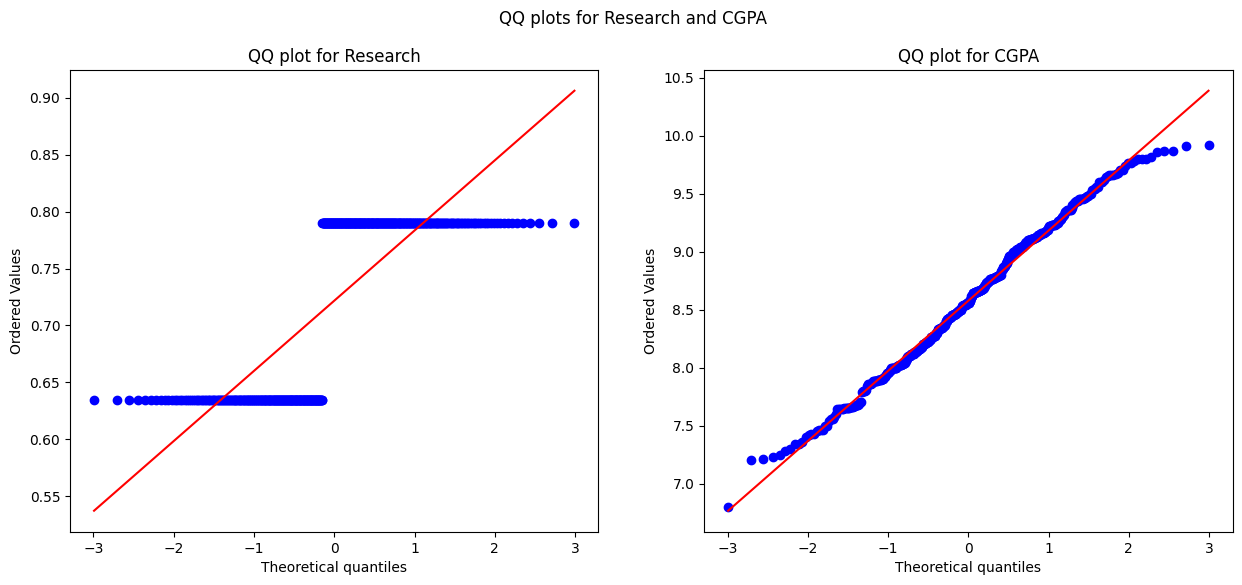

In [ ]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for Research and CGPA')
stats.probplot(df1['Research'], plot = plt, dist = 'norm')
plt.title('QQ plot for Research')
plt.subplot(1, 2, 2)
stats.probplot(df1['CGPA'], plot = plt, dist = 'norm')
plt.title('QQ plot for CGPA')
plt.show()

It can be seen from the above plots that the samples do not come from normal distribution. Applying Shapiro-Wilk test for normality

H0: The sample follows normal distribution

H1: The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = stats.shapiro(df1['Research'].sample(100))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.7484196599207302e-14
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = stats.shapiro(df1['CGPA'].sample(100))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.6559905409812927
The sample follows normal distribution


* Transforming the data using boxcox transformation to check if the transformed data follows normal distribution.

In [ ]:
transformed_Research = stats.boxcox(df1['Research'])[0]
test_stat, p_value = stats.shapiro(transformed_Research)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.374212708434901e-31
The sample does not follow normal distribution


In [ ]:
transformed_CGPA = stats.boxcox(df1['CGPA'])[0]
test_stat, p_value = stats.shapiro(transformed_CGPA)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.010205199010670185
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the "Research" and "CGPA" columns, the distributions do not follow normal distribution.
* Homogeneity of Variances using Lavene's test

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = stats.levene(df1['Research'], df1['CGPA'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.250042964453091e-123
The samples do not have  Homogenous Variance


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.


In [ ]:
test_stat, p_value = stats.mannwhitneyu(df1['Research'], df1['CGPA'])
print('P-value :',p_value)

P-value : 1.8893877388217122e-170


Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar.

Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

# **residplot**

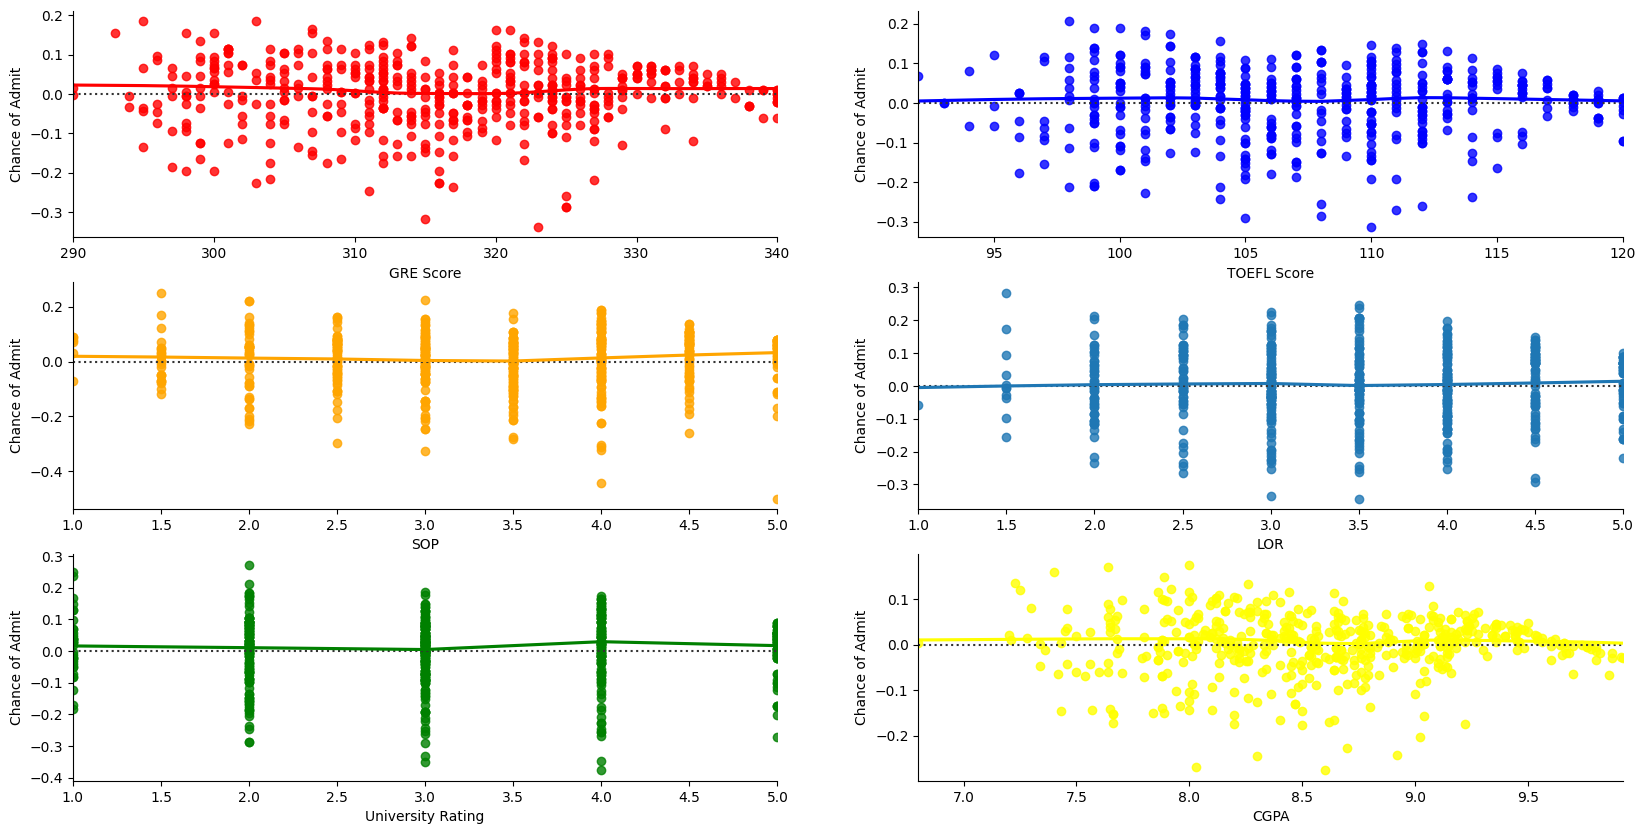

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,10))
sns.residplot(x=df['GRE Score'], y=df['Chance of Admit'], ax=ax[0,0],lowess=True,color = 'red')
sns.residplot(x=df['TOEFL Score'], y=df['Chance of Admit'], ax=ax[0,1],lowess=True, color = 'blue')
sns.residplot(x=df['SOP'], y=df['Chance of Admit'], ax=ax[1,0],lowess=True, color = 'orange')
sns.residplot(x=df['LOR'], y=df['Chance of Admit'], ax=ax[1,1],lowess=True)
sns.residplot(x=df['University Rating'], y=df['Chance of Admit'],ax=ax[2,0],lowess=True,color = 'green')
sns.residplot(x=df['CGPA'], y=df['Chance of Admit'], ax=ax[2,1],lowess=True,color ='yellow')
sns.despine()
plt.show()

while checking for Homosicydacity in columns like CGPA, TOFEL score, GRE score have a high in nature.

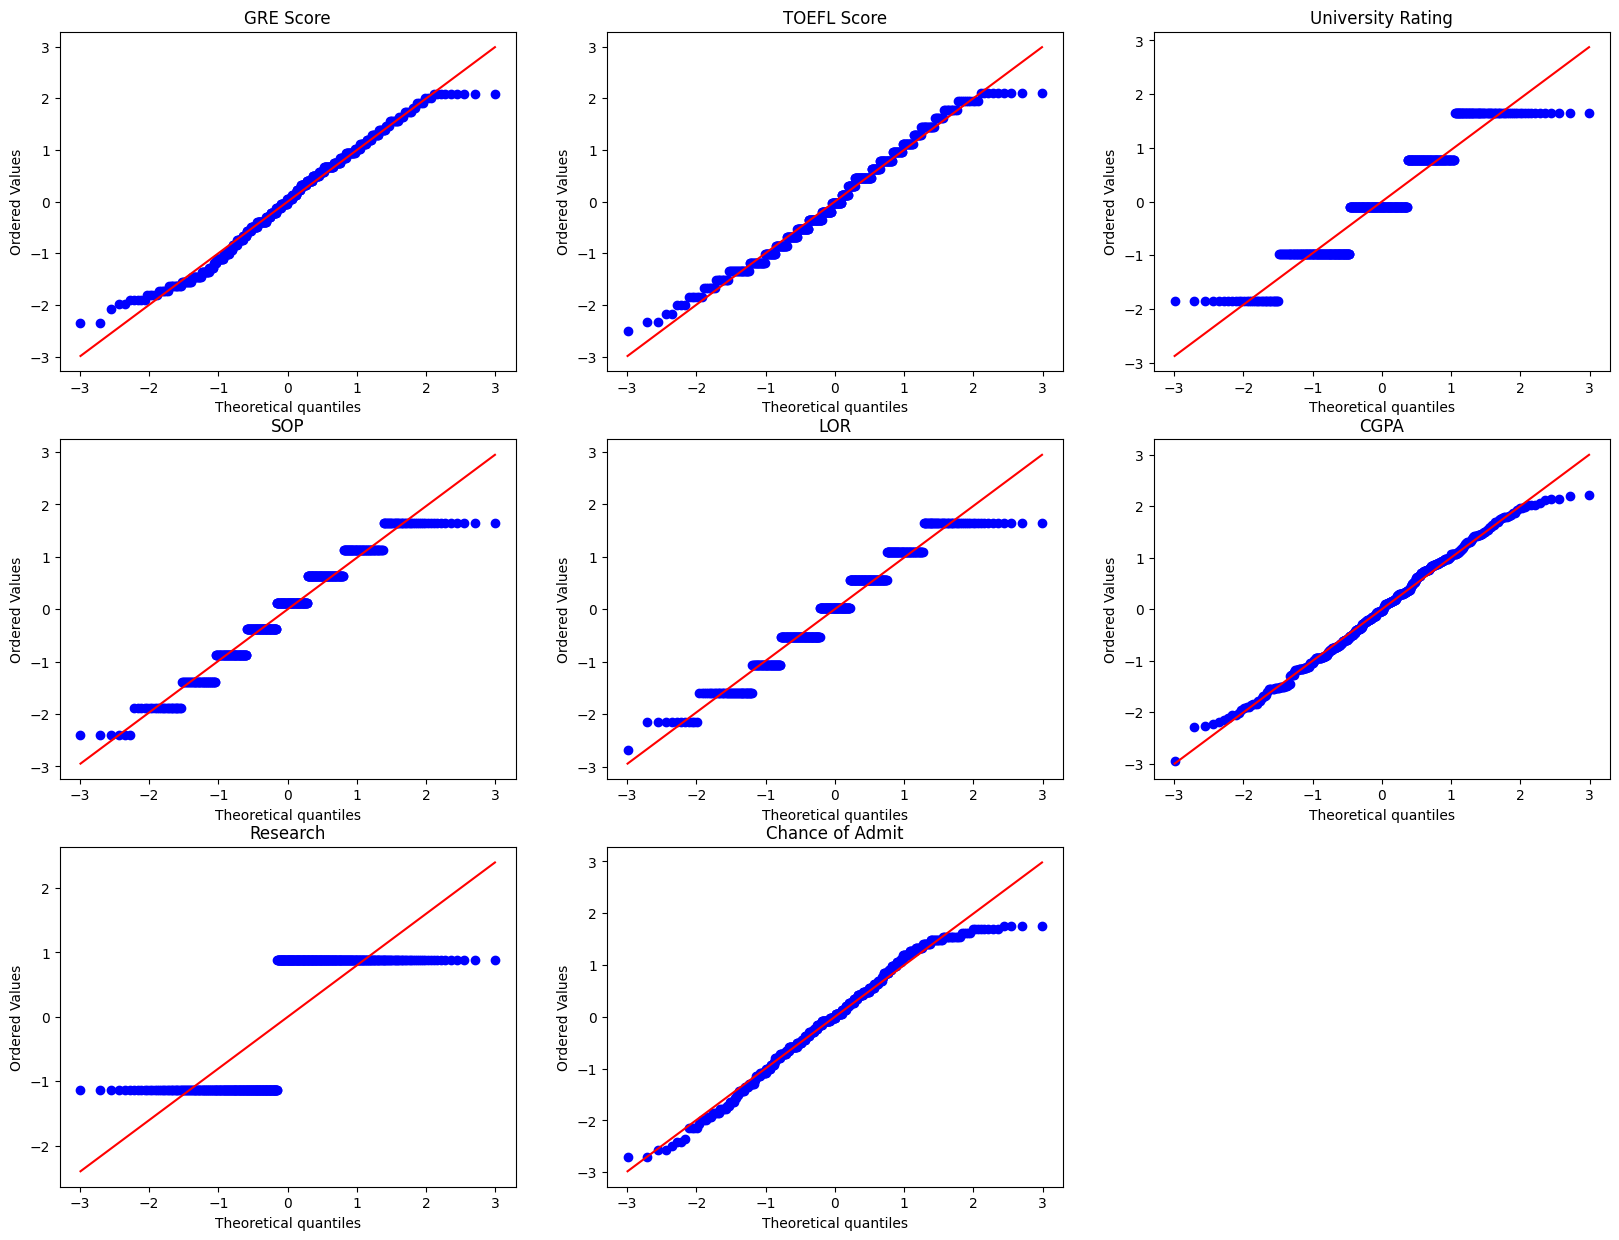

In [ ]:
#test for variance in the variables
count = 1
plt.figure(figsize=(20,15))
for i in df.columns:
  plt.subplot(3,3,count)
  observation = df[i]
  z = (observation-np.mean(observation))/np.std(observation)
  stats.probplot(z, dist="norm", plot=plt)
  plt.title(i)
  count += 1

from this qq plot we infer that the columns: CGPA, TOFEL score, GRE score are likely to be Normal, where as other columns are not.

Mean of residuals

In [ ]:
residuals = y_test - y_predict
print('Mean of Residuals:',(sum(np.array(residuals)/len(residuals))))

Mean of Residuals: -0.01079373825665466


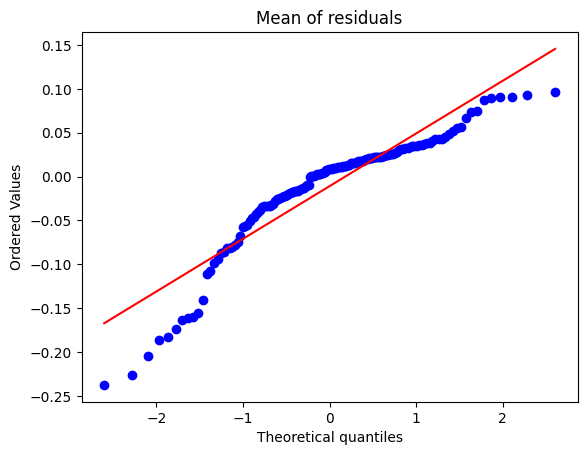

In [ ]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Mean of residuals")
plt.show()

Linearity of variables (no pattern in residual plot)

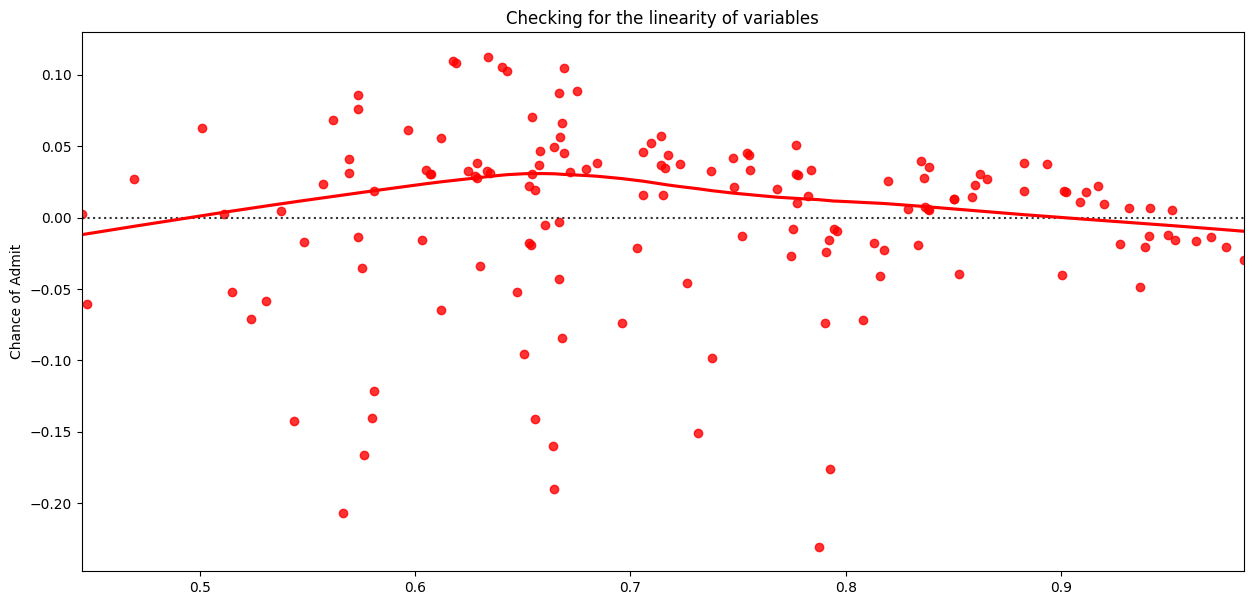

In [ ]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=residuals,lowess=True,color='red')
plt.title('Checking for the linearity of variables')
plt.show()

No linearity of Variable can be observed

Test for Homoscedasticity

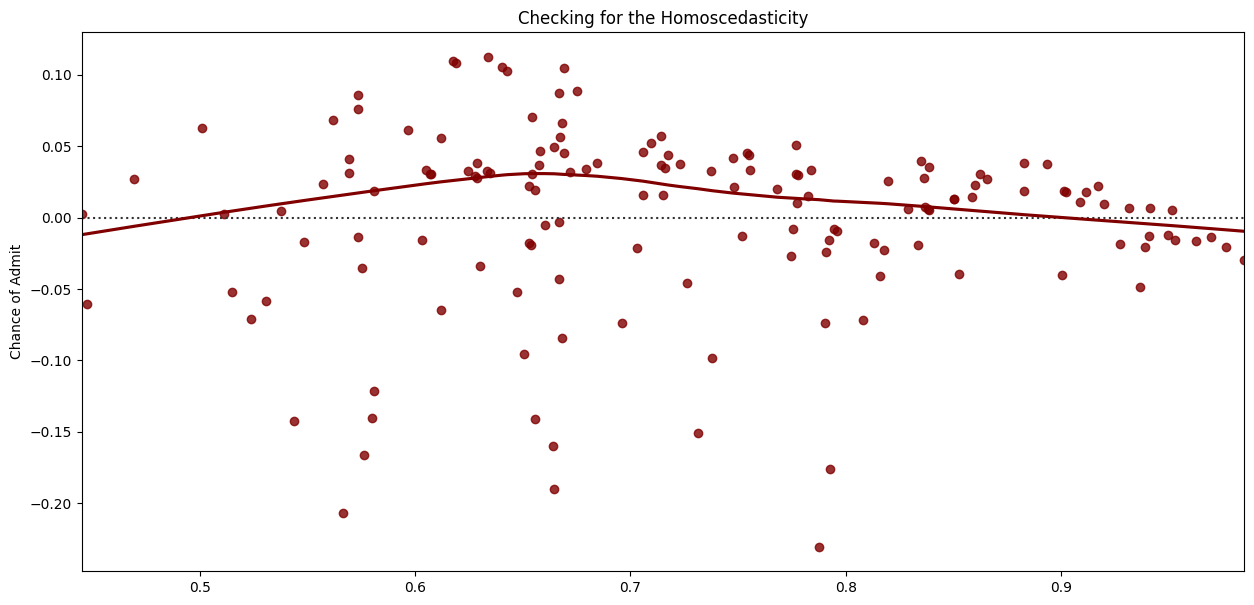

In [ ]:
plt.figure(figsize=(15,7))
sns.residplot(x=y_predict,y=residuals,lowess=True,color='maroon')
plt.title('Checking for the Homoscedasticity')
plt.show()

Since the plot is not creating a cone type shape. Hence there is no homoscedasticity present in the data.

Normality of residuals

In [ ]:
normal = y_test - y_predict
normal.head()

304   -0.032803
340    0.040549
47    -0.046701
67    -0.161461
479   -0.028033
Name: Chance of Admit, dtype: float64

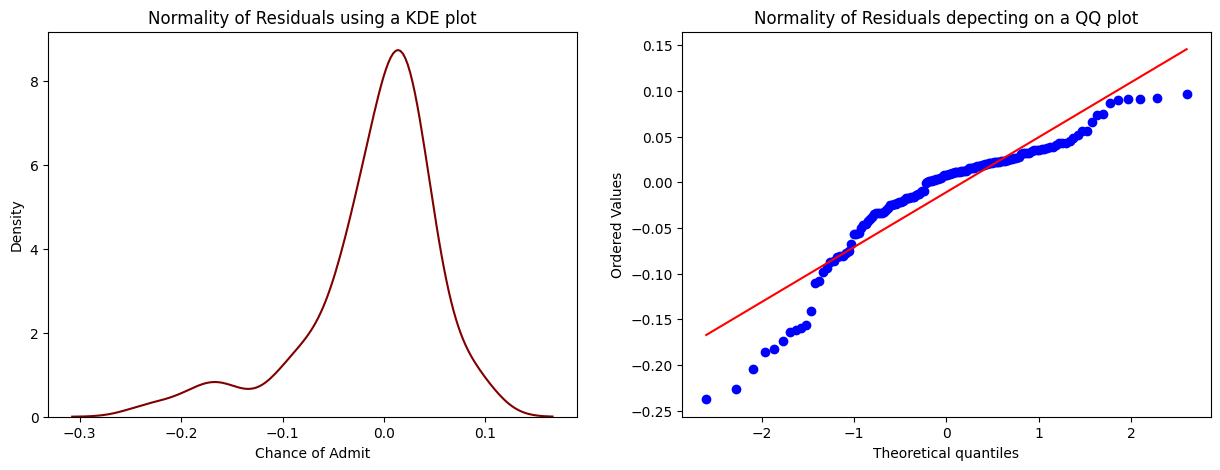

In [ ]:
# qq-plot and kde plot of residuals
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
sns.kdeplot(x=normal,color='maroon')
plt.title('Normality of Residuals using a KDE plot')

ax = fig.add_subplot(1,2,2)
sp.stats.probplot(normal,plot=plt)
plt.title('Normality of Residuals depecting on a QQ plot')
plt.show()

# Feature enhacement

In [ ]:
df1['col_produ'] = df1['University Rating'] * df1['SOP'] * df1['LOR'] * df1['Research']
df1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  3    7    7  9.65  0.789964   
1        324          107                  3    6    7  8.87  0.789964   
2        316          104                  2    4    5  8.00  0.789964   
3        322          110                  2    5    3  8.67  0.789964   
4        314          103                  1    2    4  8.21  0.634909   

   Chance of Admit   col_produ  
0             0.92  116.124750  
1             0.76   99.535500  
2             0.72   31.598571  
3             0.80   23.698929  
4             0.65    5.079273

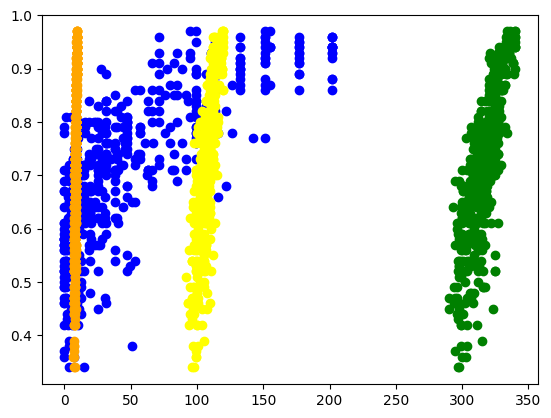

In [ ]:
plt.scatter(x = df1['col_produ'], y= df1['Chance of Admit'], color='blue')
plt.scatter(x = df1['GRE Score'], y= df1['Chance of Admit'], color='green')
plt.scatter(x = df1['TOEFL Score'], y= df1['Chance of Admit'], color='yellow')
plt.scatter(x = df1['CGPA'], y= df1['Chance of Admit'], color='orange')

In [ ]:
X = df1[['University Rating', 'LOR', 'Research','col_produ', 'GRE Score','TOEFL Score', 'CGPA']]
Y = df1['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8465139877067883

In [ ]:
df1['colprod_gre'] = df1['col_produ'] * df1['GRE Score']
df1['colprod_toef'] = df1['col_produ'] * df1['TOEFL Score']
df1['colprod_cgpa'] = df1['col_produ'] * df1['CGPA']
df1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  3    7    7  9.65  0.789964   
1        324          107                  3    6    7  8.87  0.789964   
2        316          104                  2    4    5  8.00  0.789964   
3        322          110                  2    5    3  8.67  0.789964   
4        314          103                  1    2    4  8.21  0.634909   

   Chance of Admit   col_produ   colprod_gre  colprod_toef  colprod_cgpa  
0             0.92  116.124750  39134.040750  13702.720500   1120.603838  
1             0.76   99.535500  32249.502000  10650.298500    882.879885  
2             0.72   31.598571   9985.148571   3286.251429    252.788571  
3             0.80   23.698929   7631.055000   2606.882143    205.469711  
4             0.65    5.079273   1594.891636    523.165091     41.700829

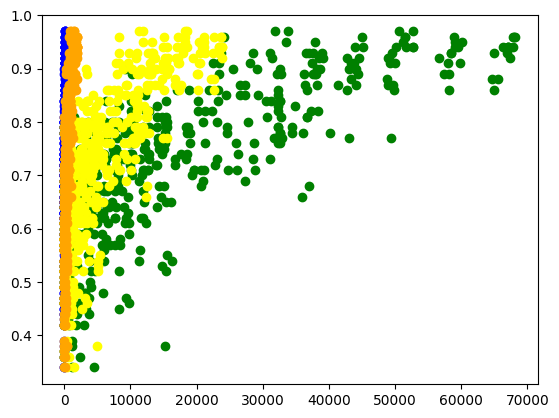

In [ ]:
plt.scatter(x = df1['col_produ'], y= df1['Chance of Admit'], color='blue')
plt.scatter(x = df1['colprod_gre'], y= df1['Chance of Admit'], color='green')
plt.scatter(x = df1['colprod_toef'], y= df1['Chance of Admit'], color='yellow')
plt.scatter(x = df1['colprod_cgpa'], y= df1['Chance of Admit'], color='orange')

In [ ]:
X = df1[['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score',
       'TOEFL Score', 'CGPA', 'col_produ', 'colprod_gre',
       'colprod_toef', 'colprod_cgpa']]
Y = df1['Chance of Admit']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# with new feature - added 'col_produ', 'colprod_gre','colprod_toef', 'colprod_cgpa
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8272278284415178

In [ ]:
# with new feature - removed
model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(x_train[['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA', 'col_produ']], y_train)
model.score(x_test[['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA', 'col_produ']], y_test)

0.8275180975903552

with new features added its increasing the model sightly so we are good to add those features also

Adjusted R score and Polynomial Degree :

In [ ]:
def adj_r(r_sq,X,Y):
  adj_r = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)
output = model.predict(x_test)

print('Adj. R-square:', adj_r(model.score(x_test, y_test),x_train,y_train ) )

Adj. R-square: 0.8223296483200089


In [ ]:
# polinomial features for 1 to 5 degree

for i in range(1, 6):
  #creates polynomial feature
  poly = PolynomialFeatures(i)
  X_poly = poly.fit_transform(x_train)

  #Standardization
  scaler = StandardScaler()
  scaler.fit(X_poly)
  X_poly_scaled = scaler.transform(X_poly)

  #training model
  model = LinearRegression()
  model.fit(X_poly_scaled, y_train)

  #Prediction
  output = model.predict(X_poly_scaled)

  # Adj R2 Score
  print(f'Adj. R-square for Model Degree {i}: {adj_r(model.score(X_poly_scaled, y_train),X_poly_scaled,y_train )}' )

Adj. R-square for Model Degree 1: 0.8177762760551731
Adj. R-square for Model Degree 2: 0.8087500942013172
Adj. R-square for Model Degree 3: -0.6044280536542681
Adj. R-square for Model Degree 4: 1.0
Adj. R-square for Model Degree 5: 1.0


In [ ]:
# polinomial features upto 100 degree

degrees = 10 # number of data-points
train_scores = []
test_scores = []

train_loss = []
test_loss = []

for degree in range(1, degrees):
  polyreg_scaled = PolynomialFeatures(degree)
  polyreg_scaled = StandardScaler()
  polyreg_scaled = LinearRegression()

  polyreg_scaled.fit(x_train, y_train)

  train_score = polyreg_scaled.score(x_train, y_train)
  test_score = polyreg_scaled.score(x_test, y_test)

  train_scores.append(adj_r(train_score,x_train,y_train))
  test_scores.append(adj_r(test_score,x_test,y_test))

  output1 = polyreg_scaled.predict(x_train)
  output2 = polyreg_scaled.predict(x_test)

  train_loss.append(mean_squared_error(y_train,output1))
  test_loss.append(mean_squared_error(y_test,output2))

Text(0, 0.5, 'MSE')

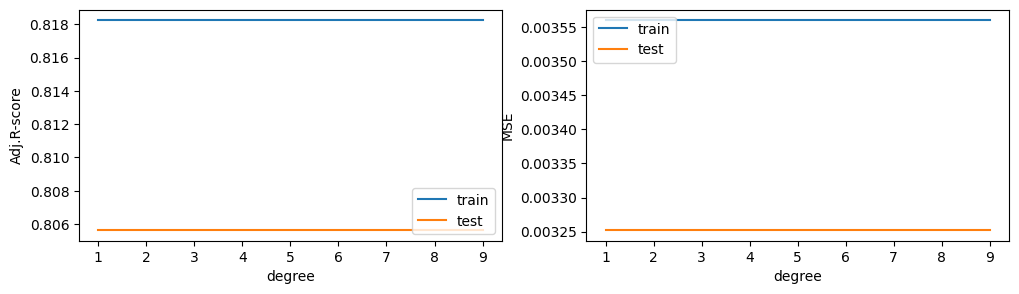

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(list(range(1, 10)), train_scores, label="train")
axes[0].plot(list(range(1, 10)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, 10)), train_loss, label="train")
axes[1].plot(list(range(1, 10)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

In [ ]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(x_train)
X_test_poly_scaled = scaler.transform(x_test)
model = LinearRegression()
model.fit(X_train_poly_scaled , y_train)

output = model.predict(X_test_poly_scaled)
print('MSE for test:', mean_squared_error(y_test, output))

output = model.predict(X_train_poly_scaled)
print('MSE for train:', mean_squared_error(y_train, output))


MSE for test: 0.003252047392202423
MSE for train: 0.003560122401203562


In [ ]:
Lasso_model = Lasso(alpha= 0.001)
Lasso_model.fit(X_train_poly_scaled, y_train)
print(Lasso_model.score(X_train_poly_scaled, y_train))
print(Lasso_model.score(X_test_poly_scaled, y_test))

Lasso_predictions = Lasso_model.predict(X_test_poly_scaled)
print('test MSE for L1:', mean_squared_error(y_test, Lasso_predictions))

0.8206931999810609
0.8304839816873312
test MSE for L1: 0.0031907576336947874


In [ ]:
ridge_model = Ridge(alpha= 0.001)
ridge_model.fit(X_train_poly_scaled, y_train)
print(ridge_model.score(X_train_poly_scaled, y_train))
print(ridge_model.score(X_test_poly_scaled, y_test))

ridge_predictions = ridge_model.predict(X_test_poly_scaled)
print('test MSE for L2:', mean_squared_error(y_test, ridge_predictions))

0.8232566321741103
0.8272447952758574
test MSE for L2: 0.003251728029721356


when we compair with L1 and L2 regularization we come with bothe are giving the same MSE, but in accurate L2 regulirazations is better. to use in this case.

In [ ]:
model = make_pipeline(PolynomialFeatures(degree=1), StandardScaler(), LinearRegression())
model.fit(x_train, y_train)
model.score(x_test, y_test)
op = model.predict(x_test)
print('MSE without any regularization: ',mean_squared_error(y_test, op))

ridge_model = Ridge(alpha= 0.00001)
ridge_model.fit(x_train, y_train)
ridge_model.score(x_test, y_test)
op = ridge_model.predict(x_test)
print('MSE with L2 regularization: ',mean_squared_error(y_test, op))

MSE without any regularization:  0.00325204739220242
MSE with L2 regularization:  0.003252045418129386


In [ ]:
df1.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research  \
0        337          118                  3    7    7  9.65  0.789964   
1        324          107                  3    6    7  8.87  0.789964   
2        316          104                  2    4    5  8.00  0.789964   
3        322          110                  2    5    3  8.67  0.789964   
4        314          103                  1    2    4  8.21  0.634909   

   Chance of Admit   col_produ   colprod_gre  colprod_toef  colprod_cgpa  
0             0.92  116.124750  39134.040750  13702.720500   1120.603838  
1             0.76   99.535500  32249.502000  10650.298500    882.879885  
2             0.72   31.598571   9985.148571   3286.251429    252.788571  
3             0.80   23.698929   7631.055000   2606.882143    205.469711  
4             0.65    5.079273   1594.891636    523.165091     41.700829

In [ ]:
df1.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit', 'col_produ', 'colprod_gre',
       'colprod_toef', 'colprod_cgpa'],
      dtype='object')

In [ ]:
x = df1[['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score',
       'TOEFL Score', 'CGPA', 'col_produ', 'colprod_gre',
       'colprod_toef', 'colprod_cgpa']]
y = df1['Chance of Admit']
x_tr_cv, x_test, y_tr_cv, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((300, 11), (100, 11), (100, 11))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((300,), (100,), (100,))

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

model = make_pipeline( PolynomialFeatures(degree=1), LinearRegression())
model.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [ ]:
model.score(x_val, y_val)

0.8413650553007018

In [ ]:
op = model.predict(x_test)
mean_squared_error(y_test, op)

0.003472323594383571

In [ ]:
df_xtest = pd.DataFrame(x_test, columns=['University Rating', 'SOP', 'LOR', 'Research', 'GRE Score','TOEFL Score', 'CGPA', 'col_produ', 'colprod_gre',
       'colprod_toef', 'colprod_cgpa'])
df_xtest.tail()

University Rating       SOP       LOR  Research  GRE Score  TOEFL Score  \
95           0.813421  0.629493  1.060719  0.892416   0.927210     0.577919   
96           1.681841  1.118737  0.529474  0.892416   0.499003     1.056417   
97          -0.923420  0.629493 -0.533016 -1.120553  -1.556387    -1.495572   
98          -0.055000  0.140250  0.529474 -1.120553  -0.014844     0.418420   
99           1.681841 -0.348994 -0.533016 -1.120553  -0.956898     0.099421   

        CGPA  col_produ  colprod_gre  colprod_toef  colprod_cgpa  
95  0.712990   0.855847     0.850238      0.813409      0.809554  
96  0.615955   1.456487     1.406181      1.451940      1.366349  
97 -0.855738  -0.670220    -0.678403     -0.681646     -0.672188  
98  0.001402  -0.256438    -0.269215     -0.259642     -0.281897  
99 -0.127978  -0.210462    -0.249809     -0.228648     -0.246478

In [ ]:
df_ytest = pd.DataFrame({'Chance of admit' : y_test, 'preducted chance of admit' : op})
df_ytest

Chance of admit  preducted chance of admit
304             0.62                   0.662791
340             0.75                   0.701727
47              0.89                   0.932008
67              0.57                   0.726607
479             0.79                   0.818226
..               ...                        ...
11              0.84                   0.834740
192             0.86                   0.844748
92              0.34                   0.571760
221             0.75                   0.723330
110             0.61                   0.687876

[100 rows x 2 columns]

In [ ]:
df_ytest['Chance of admit'].nunique(),df_ytest['preducted chance of admit'].nunique()

(45, 100)

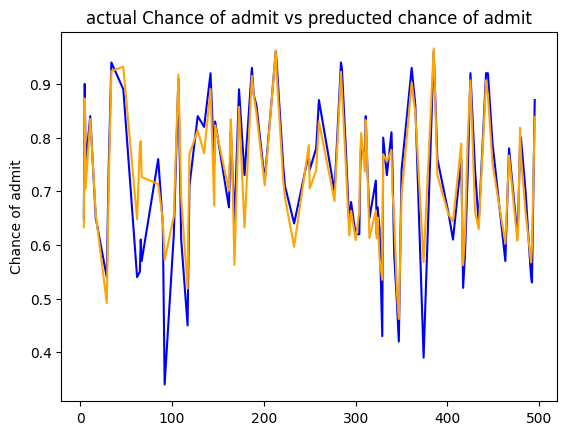

In [ ]:
sns.lineplot(df_ytest['Chance of admit'], color='blue',legend='auto')
sns.lineplot(df_ytest['preducted chance of admit'], color= 'orange',legend='auto')
plt.title('actual Chance of admit vs preducted chance of admit')
plt.show()

**Insights**

* Multicollinearity is present in the data.

* After removing collinear features there are only two variables which are
important in making predictions for the target variables.

* Indepedent variables are linearly correlated with dependent variables.

- Research shows 0.5 correlation with GRE Score, CGPA as well as chance of Admit meaning researchers are

- SOP is increasing with LOR.

- GRE Score and TOEFL Score share a strong correlation meaning that students who are performing well in GRE are also doing doing well
with TOEFL.

- CGPA shares a strong correlation with GRE as well as TOEFL Score as better scores increses CGPA of a student.


**Recommendations**

CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.

CGPA is the most important varibale in making the prediction for the Chance of Admit.

Following are the final model results on the test data:

RMSE: 0.07

MAE: 0.05

R2_score: 0.81

Adjusted_R2: 0.81